# 🌬️ Wind Turbine Performance Data Analysis

## 1. Importing Required Libraries

In this section, we import all necessary Python libraries for data manipulation, statistical analysis, and visualization. Each library serves a specific purpose in our analysis pipeline.

In [1]:
# ============================================================================
# IMPORTING REQUIRED LIBRARIES
# ============================================================================

# Data Manipulation Libraries
import pandas as pd                          # For data manipulation and analysis
import numpy as np                           # For numerical computations

# Visualization Libraries
import matplotlib.pyplot as plt              # For creating static visualizations
import seaborn as sns                        # For statistical visualizations

# Date and Time handling
from datetime import datetime, timedelta    # For datetime operations

# Statistical Analysis
from scipy import stats                      # For statistical tests
from scipy.stats import pearsonr, spearmanr # For correlation analysis
from scipy.stats import normaltest           # For normality testing

# Warning Suppression
import warnings                              # To handle warnings
warnings.filterwarnings('ignore')            # Suppress unnecessary warnings

# Display Settings
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.max_rows', 100)       # Show up to 100 rows
pd.set_option('display.width', None)         # Auto-adjust display width
pd.set_option('display.float_format', '{:.2f}'.format)  # Float formatting

# Matplotlib Settings
plt.rcParams['figure.figsize'] = (12, 6)     # Default figure size
plt.rcParams['font.size'] = 12               # Default font size
plt.rcParams['axes.titlesize'] = 14          # Title font size
plt.rcParams['axes.labelsize'] = 12          # Axis label font size

# Seaborn Style Settings
sns.set_style("whitegrid")                   # Set seaborn style
sns.set_palette("husl")                      # Set color palette


## 2. Loading the Dataset

Loading the wind turbine dataset from the local directory. We'll perform initial inspection to understand the structure, size, and basic properties of our data.

In [2]:
# ============================================================================
# LOADING THE DATASET
# ============================================================================

# Define the file path
file_path = r"C:\Users\sagar\Desktop\Machine Learning Projects\wind turbine project\Wind_Turbine.csv"

# Load the dataset
dataset = pd.read_csv(file_path)

# Create a copy for safe manipulation
df = dataset.copy()

print("=" * 60)
print("DATASET LOADED SUCCESSFULLY!")
print("=" * 60)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Total Data Points: {df.shape[0] * df.shape[1]:,}")
print("=" * 60)

DATASET LOADED SUCCESSFULLY!

Dataset Shape: 50530 rows × 5 columns
Total Data Points: 252,650


## 3. Initial Data Exploration

This section provides a comprehensive first look at our dataset including:
- First and last few records
- Column information and data types
- Basic statistical summary
- Memory usage analysis

In [3]:
# ============================================================================
# INITIAL DATA EXPLORATION - PART 1
# ============================================================================

# Display first 10 rows
print("=" * 80)
print("FIRST 10 ROWS OF THE DATASET")
print("=" * 80)
print(df.head(10))
print("\n")

# Display last 10 rows
print("=" * 80)
print("LAST 10 ROWS OF THE DATASET")
print("=" * 80)
print(df.tail(10))
print("\n")

# Display random sample of 5 rows
print("=" * 80)
print("RANDOM SAMPLE OF 5 ROWS")
print("=" * 80)
print(df.sample(5, random_state=42))

FIRST 10 ROWS OF THE DATASET
          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00               380.05              5.31   
1  01 01 2018 00:10               453.77              5.67   
2  01 01 2018 00:20               306.38              5.22   
3  01 01 2018 00:30               419.65              5.66   
4  01 01 2018 00:40               380.65              5.58   
5  01 01 2018 00:50               402.39              5.60   
6  01 01 2018 01:00               447.61              5.79   
7  01 01 2018 01:10               387.24              5.31   
8  01 01 2018 01:20               463.65              5.58   
9  01 01 2018 01:30               439.73              5.52   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.33              259.99  
1                         519.92              268.64  
2                         390.90              272.56  
3                         516.13              271.26  
4            

In [4]:
# ============================================================================
# INITIAL DATA EXPLORATION - PART 2: COLUMN INFORMATION
# ============================================================================

print("=" * 80)
print("COLUMN NAMES AND DATA TYPES")
print("=" * 80)

# Create a detailed column information dataframe
column_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isnull().sum().values,
    'Null Percentage': (df.isnull().sum().values / len(df) * 100).round(2),
    'Unique Values': df.nunique().values
})

print(column_info.to_string(index=False))
print("\n")

# Dataset Info
print("=" * 80)
print("DETAILED DATASET INFORMATION")
print("=" * 80)
df.info()

COLUMN NAMES AND DATA TYPES
                  Column Name Data Type  Non-Null Count  Null Count  Null Percentage  Unique Values
                    Date/Time    object           50530           0             0.00          50530
          LV ActivePower (kW)   float64           50530           0             0.00          38764
             Wind Speed (m/s)   float64           50530           0             0.00          50305
Theoretical_Power_Curve (KWh)   float64           50530           0             0.00          37157
           Wind Direction (°)   float64           50530           0             0.00          50251


DETAILED DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  f

In [5]:
# ============================================================================
# INITIAL DATA EXPLORATION - PART 3: MEMORY USAGE
# ============================================================================

print("\n" + "=" * 80)
print("MEMORY USAGE ANALYSIS")
print("=" * 80)

# Calculate memory usage per column
memory_usage = df.memory_usage(deep=True)

print("\nMemory Usage by Column:")
print("-" * 40)
for col in df.columns:
    mem_bytes = df[col].memory_usage(deep=True)
    mem_kb = mem_bytes / 1024
    mem_mb = mem_kb / 1024
    print(f"{col}: {mem_kb:.2f} KB ({mem_mb:.4f} MB)")

print("-" * 40)
total_memory = memory_usage.sum()
print(f"Total Memory Usage: {total_memory / 1024:.2f} KB ({total_memory / (1024**2):.4f} MB)")
print("=" * 80)


MEMORY USAGE ANALYSIS

Memory Usage by Column:
----------------------------------------
Date/Time: 3207.60 KB (3.1324 MB)
LV ActivePower (kW): 394.89 KB (0.3856 MB)
Wind Speed (m/s): 394.89 KB (0.3856 MB)
Theoretical_Power_Curve (KWh): 394.89 KB (0.3856 MB)
Wind Direction (°): 394.89 KB (0.3856 MB)
----------------------------------------
Total Memory Usage: 4786.66 KB (4.6745 MB)


## 4. Data Type Conversion

Converting data types to appropriate formats:
- **Date/Time**: Convert from object (string) to datetime64
- **Numerical columns**: Ensure proper float64 type
- **Extract temporal features**: Year, Month, Day, Hour, etc.

In [6]:
# ============================================================================
# DATA TYPE CONVERSION - DATETIME CONVERSION
# ============================================================================

print("=" * 80)
print("DATA TYPE CONVERSION")
print("=" * 80)

# Check original data type of Date/Time column
print(f"\nOriginal Date/Time Data Type: {df['Date/Time'].dtype}")
print(f"Sample Date/Time Values:\n{df['Date/Time'].head()}")

# Convert Date/Time to datetime format
# Try multiple date formats to handle different possibilities
try:
    df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')
except:
    try:
        df['Date/Time'] = pd.to_datetime(df['Date/Time'], dayfirst=True)
    except:
        df['Date/Time'] = pd.to_datetime(df['Date/Time'], infer_datetime_format=True)

print(f"\nConverted Date/Time Data Type: {df['Date/Time'].dtype}")
print(f"Sample Converted Values:\n{df['Date/Time'].head()}")
print("=" * 80)

DATA TYPE CONVERSION

Original Date/Time Data Type: object
Sample Date/Time Values:
0    01 01 2018 00:00
1    01 01 2018 00:10
2    01 01 2018 00:20
3    01 01 2018 00:30
4    01 01 2018 00:40
Name: Date/Time, dtype: object

Converted Date/Time Data Type: datetime64[ns]
Sample Converted Values:
0   2018-01-01 00:00:00
1   2018-01-01 00:10:00
2   2018-01-01 00:20:00
3   2018-01-01 00:30:00
4   2018-01-01 00:40:00
Name: Date/Time, dtype: datetime64[ns]


In [7]:
# ============================================================================
# EXTRACTING TEMPORAL FEATURES FROM DATETIME
# ============================================================================

print("=" * 80)
print("EXTRACTING TEMPORAL FEATURES")
print("=" * 80)

# Extract various temporal components
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour
df['Minute'] = df['Date/Time'].dt.minute
df['DayOfWeek'] = df['Date/Time'].dt.dayofweek
df['DayName'] = df['Date/Time'].dt.day_name()
df['MonthName'] = df['Date/Time'].dt.month_name()
df['WeekOfYear'] = df['Date/Time'].dt.isocalendar().week
df['Quarter'] = df['Date/Time'].dt.quarter
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Create time-based categories
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(categorize_hour)

# Create season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

print("Temporal Features Extracted Successfully!")
print(f"\nNew Columns Added: {list(df.columns[5:])}")
print(f"\nSample Data with New Features:")
print(df[['Date/Time', 'Year', 'Month', 'Day', 'Hour', 'DayName', 'Season', 'TimeOfDay']].head(10))

EXTRACTING TEMPORAL FEATURES
Temporal Features Extracted Successfully!

New Columns Added: ['Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek', 'DayName', 'MonthName', 'WeekOfYear', 'Quarter', 'IsWeekend', 'TimeOfDay', 'Season']

Sample Data with New Features:
            Date/Time  Year  Month  Day  Hour DayName  Season TimeOfDay
0 2018-01-01 00:00:00  2018      1    1     0  Monday  Winter     Night
1 2018-01-01 00:10:00  2018      1    1     0  Monday  Winter     Night
2 2018-01-01 00:20:00  2018      1    1     0  Monday  Winter     Night
3 2018-01-01 00:30:00  2018      1    1     0  Monday  Winter     Night
4 2018-01-01 00:40:00  2018      1    1     0  Monday  Winter     Night
5 2018-01-01 00:50:00  2018      1    1     0  Monday  Winter     Night
6 2018-01-01 01:00:00  2018      1    1     1  Monday  Winter     Night
7 2018-01-01 01:10:00  2018      1    1     1  Monday  Winter     Night
8 2018-01-01 01:20:00  2018      1    1     1  Monday  Winter     Night
9 2018-01-01 01:

In [8]:
# ============================================================================
# VERIFYING AND CONVERTING NUMERICAL COLUMNS
# ============================================================================

print("\n" + "=" * 80)
print("NUMERICAL COLUMN VERIFICATION AND CONVERSION")
print("=" * 80)

# Define numerical columns
numerical_columns = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 
                     'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']

# Convert and verify each numerical column
for col in numerical_columns:
    original_dtype = df[col].dtype
    df[col] = pd.to_numeric(df[col], errors='coerce')
    new_dtype = df[col].dtype
    print(f"{col}:")
    print(f"  Original Type: {original_dtype} → New Type: {new_dtype}")
    print(f"  Min: {df[col].min():.2f}, Max: {df[col].max():.2f}, Mean: {df[col].mean():.2f}")
    print()

# Rename columns for easier handling
df.rename(columns={
    'LV ActivePower (kW)': 'ActivePower_kW',
    'Wind Speed (m/s)': 'WindSpeed_ms',
    'Theoretical_Power_Curve (KWh)': 'TheoreticalPower_kWh',
    'Wind Direction (°)': 'WindDirection_deg'
}, inplace=True)

print("=" * 80)
print("COLUMNS RENAMED FOR EASIER HANDLING")
print("=" * 80)
print(f"Updated Columns: {list(df.columns)}")


NUMERICAL COLUMN VERIFICATION AND CONVERSION
LV ActivePower (kW):
  Original Type: float64 → New Type: float64
  Min: -2.47, Max: 3618.73, Mean: 1307.68

Wind Speed (m/s):
  Original Type: float64 → New Type: float64
  Min: 0.00, Max: 25.21, Mean: 7.56

Theoretical_Power_Curve (KWh):
  Original Type: float64 → New Type: float64
  Min: 0.00, Max: 3600.00, Mean: 1492.18

Wind Direction (°):
  Original Type: float64 → New Type: float64
  Min: 0.00, Max: 360.00, Mean: 123.69

COLUMNS RENAMED FOR EASIER HANDLING
Updated Columns: ['Date/Time', 'ActivePower_kW', 'WindSpeed_ms', 'TheoreticalPower_kWh', 'WindDirection_deg', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek', 'DayName', 'MonthName', 'WeekOfYear', 'Quarter', 'IsWeekend', 'TimeOfDay', 'Season']


In [9]:
# ============================================================================
# FINAL DATA TYPES VERIFICATION
# ============================================================================

print("\n" + "=" * 80)
print("FINAL DATA TYPES AFTER CONVERSION")
print("=" * 80)

# Create summary of all data types
dtype_summary = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Sample Value': [df[col].iloc[0] for col in df.columns]
})

print(dtype_summary.to_string(index=False))
print("\n" + "=" * 80)


FINAL DATA TYPES AFTER CONVERSION
              Column      Data Type        Sample Value
           Date/Time datetime64[ns] 2018-01-01 00:00:00
      ActivePower_kW        float64              380.05
        WindSpeed_ms        float64                5.31
TheoreticalPower_kWh        float64              416.33
   WindDirection_deg        float64              259.99
                Year          int32                2018
               Month          int32                   1
                 Day          int32                   1
                Hour          int32                   0
              Minute          int32                   0
           DayOfWeek          int32                   0
             DayName         object              Monday
           MonthName         object             January
          WeekOfYear         UInt32                   1
             Quarter          int32                   1
           IsWeekend          int64                   0
           Ti

## 5. Data Cleaning and Preprocessing

This section handles:
- Missing value detection and treatment
- Duplicate record identification and removal
- Outlier detection using IQR and Z-score methods
- Data validation and quality checks

In [10]:
# ============================================================================
# MISSING VALUE ANALYSIS
# ============================================================================

print("=" * 80)
print("MISSING VALUE ANALYSIS")
print("=" * 80)

# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df) * 100).round(2)

# Create missing value summary
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values,
    'Present Count': (len(df) - missing_values).values
})

missing_summary = missing_summary.sort_values('Missing Count', ascending=False)
print(missing_summary.to_string(index=False))

print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")
print(f"Total Cells: {df.shape[0] * df.shape[1]}")
print(f"Overall Missing Percentage: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

MISSING VALUE ANALYSIS
              Column  Missing Count  Missing Percentage  Present Count
           Date/Time              0                0.00          50530
      ActivePower_kW              0                0.00          50530
        WindSpeed_ms              0                0.00          50530
TheoreticalPower_kWh              0                0.00          50530
   WindDirection_deg              0                0.00          50530
                Year              0                0.00          50530
               Month              0                0.00          50530
                 Day              0                0.00          50530
                Hour              0                0.00          50530
              Minute              0                0.00          50530
           DayOfWeek              0                0.00          50530
             DayName              0                0.00          50530
           MonthName              0                0.0

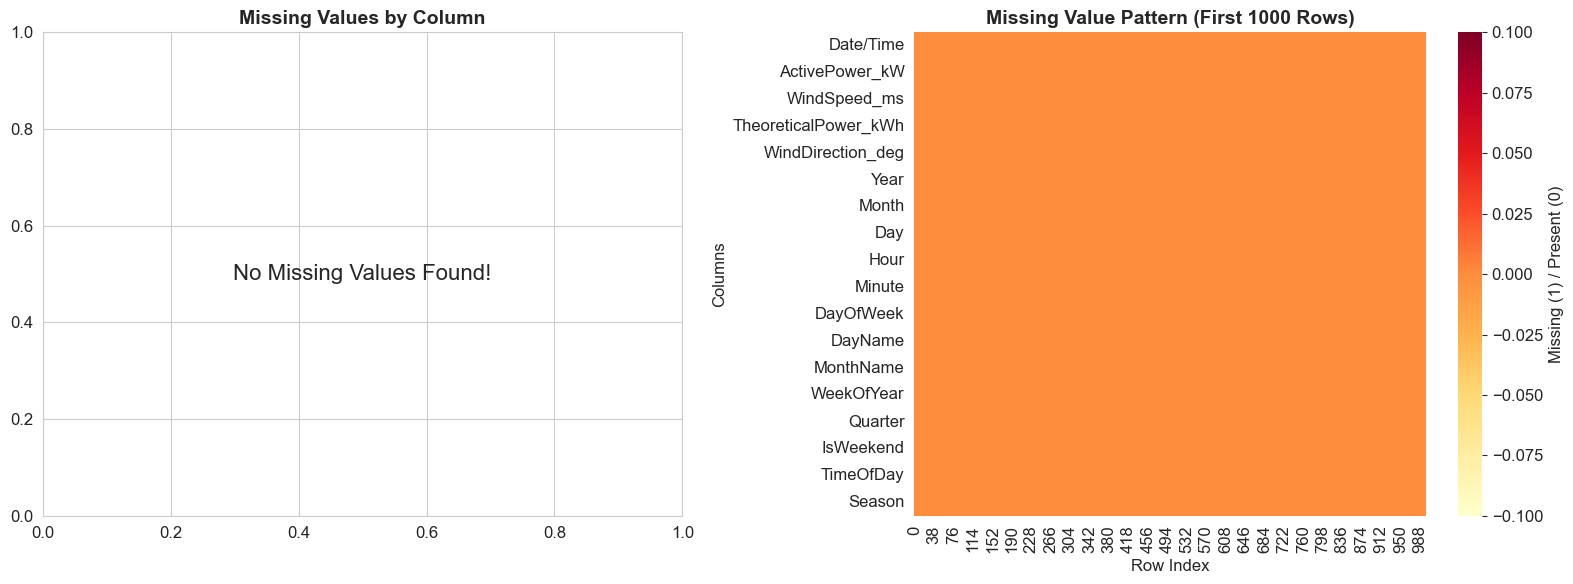

Missing value visualization saved as 'missing_values_analysis.png'


In [11]:
# ============================================================================
# MISSING VALUE VISUALIZATION
# ============================================================================

# Create visualization for missing values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Bar chart of missing values
ax1 = axes[0]
missing_cols = missing_summary[missing_summary['Missing Count'] > 0]
if len(missing_cols) > 0:
    colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(missing_cols)))
    bars = ax1.bar(range(len(missing_cols)), missing_cols['Missing Count'], color=colors)
    ax1.set_xticks(range(len(missing_cols)))
    ax1.set_xticklabels(missing_cols['Column'], rotation=45, ha='right')
    ax1.set_xlabel('Columns')
    ax1.set_ylabel('Missing Value Count')
    ax1.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
    
    # Add value labels on bars
    for bar, val in zip(bars, missing_cols['Missing Count']):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                 str(val), ha='center', va='bottom', fontsize=10)
else:
    ax1.text(0.5, 0.5, 'No Missing Values Found!', ha='center', va='center',
             fontsize=16, transform=ax1.transAxes)
    ax1.set_title('Missing Values by Column', fontsize=14, fontweight='bold')

# Plot 2: Heatmap of missing values (sample)
ax2 = axes[1]
sample_size = min(1000, len(df))
missing_matrix = df.iloc[:sample_size].isnull().astype(int)
sns.heatmap(missing_matrix.T, cbar=True, yticklabels=df.columns,
            cmap='YlOrRd', ax=ax2, cbar_kws={'label': 'Missing (1) / Present (0)'})
ax2.set_title(f'Missing Value Pattern (First {sample_size} Rows)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Row Index')
ax2.set_ylabel('Columns')

plt.tight_layout()
plt.savefig('missing_values_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Missing value visualization saved as 'missing_values_analysis.png'")

In [12]:
# ============================================================================
# HANDLING MISSING VALUES
# ============================================================================

print("=" * 80)
print("HANDLING MISSING VALUES")
print("=" * 80)

# Store original count
original_count = len(df)

# Define strategy for each column type
numerical_cols = ['ActivePower_kW', 'WindSpeed_ms', 'TheoreticalPower_kWh', 'WindDirection_deg']

# Method 1: Forward Fill for time-series continuity
print("\nApplying Forward Fill for numerical columns...")
for col in numerical_cols:
    missing_before = df[col].isnull().sum()
    df[col] = df[col].fillna(method='ffill')
    missing_after = df[col].isnull().sum()
    print(f"  {col}: {missing_before} → {missing_after} missing values")

# Method 2: Backward Fill for remaining NaN at the start
print("\nApplying Backward Fill for remaining NaN...")
for col in numerical_cols:
    missing_before = df[col].isnull().sum()
    df[col] = df[col].fillna(method='bfill')
    missing_after = df[col].isnull().sum()
    if missing_before > 0:
        print(f"  {col}: {missing_before} → {missing_after} missing values")

# Method 3: Fill any remaining with median (safety measure)
print("\nApplying Median Fill for any remaining NaN...")
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"  {col}: Filled with median = {median_val:.2f}")

# Final verification
print("\n" + "=" * 80)
print("FINAL MISSING VALUE CHECK")
print("=" * 80)
print(f"Total Missing Values After Treatment: {df.isnull().sum().sum()}")

HANDLING MISSING VALUES

Applying Forward Fill for numerical columns...
  ActivePower_kW: 0 → 0 missing values
  WindSpeed_ms: 0 → 0 missing values
  TheoreticalPower_kWh: 0 → 0 missing values
  WindDirection_deg: 0 → 0 missing values

Applying Backward Fill for remaining NaN...

Applying Median Fill for any remaining NaN...

FINAL MISSING VALUE CHECK
Total Missing Values After Treatment: 0


In [13]:
# ============================================================================
# DUPLICATE DETECTION AND REMOVAL
# ============================================================================

print("=" * 80)
print("DUPLICATE DETECTION AND REMOVAL")
print("=" * 80)

# Check for exact duplicates
exact_duplicates = df.duplicated().sum()
print(f"Exact Duplicate Rows: {exact_duplicates}")

# Check for duplicates based on Date/Time only
datetime_duplicates = df.duplicated(subset=['Date/Time']).sum()
print(f"Duplicate Date/Time Entries: {datetime_duplicates}")

# Display duplicate examples if any
if exact_duplicates > 0:
    print("\nSample Duplicate Rows:")
    duplicate_mask = df.duplicated(keep=False)
    print(df[duplicate_mask].head(10))
    
    # Remove duplicates
    df_before = len(df)
    df = df.drop_duplicates(keep='first')
    df_after = len(df)
    print(f"\nRemoved {df_before - df_after} duplicate rows")

print(f"\nDataset Shape After Duplicate Removal: {df.shape}")

DUPLICATE DETECTION AND REMOVAL
Exact Duplicate Rows: 0
Duplicate Date/Time Entries: 0

Dataset Shape After Duplicate Removal: (50530, 18)


In [14]:
# ============================================================================
# OUTLIER DETECTION - IQR METHOD
# ============================================================================

print("=" * 80)
print("OUTLIER DETECTION USING IQR METHOD")
print("=" * 80)

def detect_outliers_iqr(data, column, threshold=1.5):
    """Detect outliers using Interquartile Range method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return {
        'column': column,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': len(outliers),
        'outlier_percentage': (len(outliers) / len(data)) * 100
    }

# Detect outliers for each numerical column
numerical_cols = ['ActivePower_kW', 'WindSpeed_ms', 'TheoreticalPower_kWh', 'WindDirection_deg']
outlier_results = []

for col in numerical_cols:
    result = detect_outliers_iqr(df, col)
    outlier_results.append(result)
    print(f"\n{col}:")
    print(f"  Q1: {result['Q1']:.2f}, Q3: {result['Q3']:.2f}, IQR: {result['IQR']:.2f}")
    print(f"  Lower Bound: {result['lower_bound']:.2f}, Upper Bound: {result['upper_bound']:.2f}")
    print(f"  Outliers: {result['outlier_count']} ({result['outlier_percentage']:.2f}%)")

OUTLIER DETECTION USING IQR METHOD

ActivePower_kW:
  Q1: 50.68, Q3: 2482.51, IQR: 2431.83
  Lower Bound: -3597.07, Upper Bound: 6130.25
  Outliers: 0 (0.00%)

WindSpeed_ms:
  Q1: 4.20, Q3: 10.30, IQR: 6.10
  Lower Bound: -4.95, Upper Bound: 19.45
  Outliers: 423 (0.84%)

TheoreticalPower_kWh:
  Q1: 161.33, Q3: 2964.97, IQR: 2803.64
  Lower Bound: -4044.14, Upper Bound: 7170.44
  Outliers: 0 (0.00%)

WindDirection_deg:
  Q1: 49.32, Q3: 201.70, IQR: 152.38
  Lower Bound: -179.26, Upper Bound: 430.27
  Outliers: 0 (0.00%)


In [15]:
# ============================================================================
# OUTLIER DETECTION - Z-SCORE METHOD
# ============================================================================

print("\n" + "=" * 80)
print("OUTLIER DETECTION USING Z-SCORE METHOD")
print("=" * 80)

def detect_outliers_zscore(data, column, threshold=3):
    """Detect outliers using Z-score method"""
    mean = data[column].mean()
    std = data[column].std()
    z_scores = np.abs((data[column] - mean) / std)
    outliers = data[z_scores > threshold]
    
    return {
        'column': column,
        'mean': mean,
        'std': std,
        'threshold': threshold,
        'outlier_count': len(outliers),
        'outlier_percentage': (len(outliers) / len(data)) * 100
    }

# Detect outliers using Z-score
zscore_results = []

for col in numerical_cols:
    result = detect_outliers_zscore(df, col)
    zscore_results.append(result)
    print(f"\n{col}:")
    print(f"  Mean: {result['mean']:.2f}, Std: {result['std']:.2f}")
    print(f"  Z-Score Threshold: {result['threshold']}")
    print(f"  Outliers: {result['outlier_count']} ({result['outlier_percentage']:.2f}%)")


OUTLIER DETECTION USING Z-SCORE METHOD

ActivePower_kW:
  Mean: 1307.68, Std: 1312.46
  Z-Score Threshold: 3
  Outliers: 0 (0.00%)

WindSpeed_ms:
  Mean: 7.56, Std: 4.23
  Z-Score Threshold: 3
  Outliers: 228 (0.45%)

TheoreticalPower_kWh:
  Mean: 1492.18, Std: 1368.02
  Z-Score Threshold: 3
  Outliers: 0 (0.00%)

WindDirection_deg:
  Mean: 123.69, Std: 93.44
  Z-Score Threshold: 3
  Outliers: 0 (0.00%)


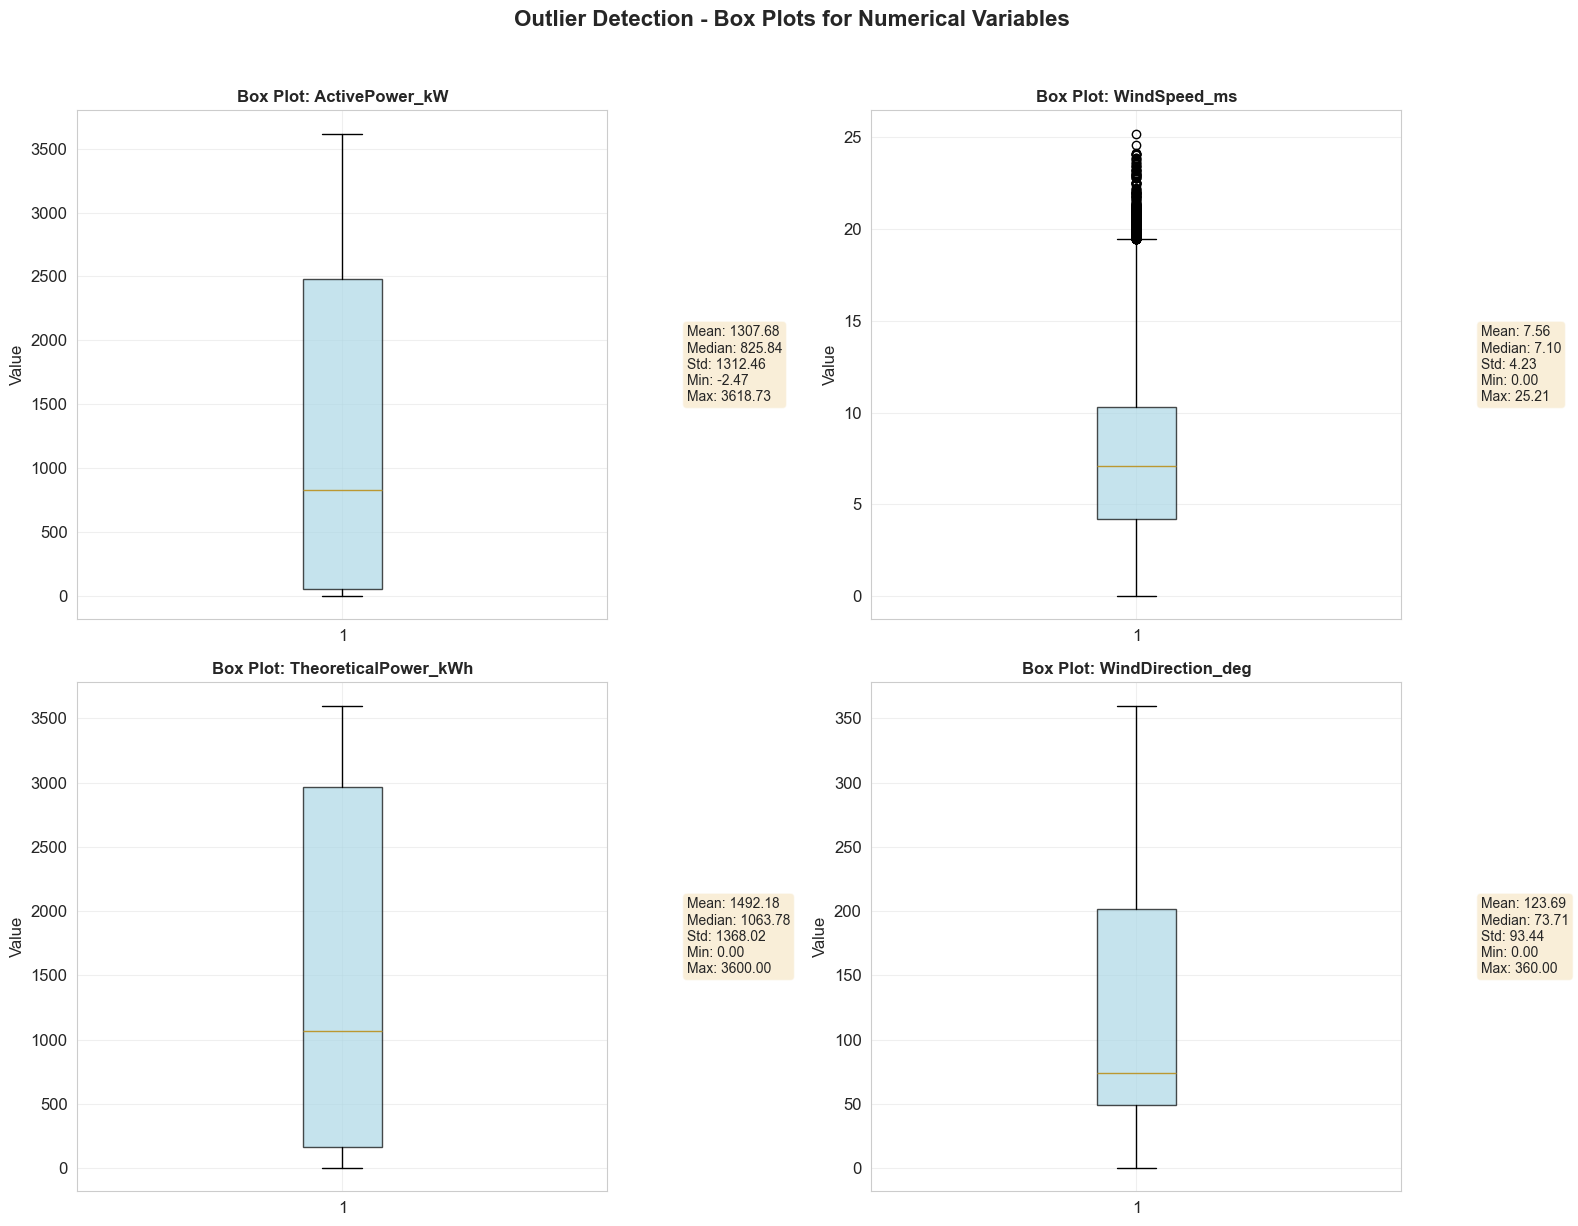

In [16]:
# ============================================================================
# OUTLIER VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Create box plot
    bp = ax.boxplot(df[col].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    
    # Add statistics text
    stats_text = f"Mean: {df[col].mean():.2f}\n"
    stats_text += f"Median: {df[col].median():.2f}\n"
    stats_text += f"Std: {df[col].std():.2f}\n"
    stats_text += f"Min: {df[col].min():.2f}\n"
    stats_text += f"Max: {df[col].max():.2f}"
    
    ax.text(1.15, 0.5, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax.set_title(f'Box Plot: {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)

plt.suptitle('Outlier Detection - Box Plots for Numerical Variables', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# ============================================================================
# HANDLING OUTLIERS - CAPPING METHOD (WINSORIZATION)
# ============================================================================

print("=" * 80)
print("HANDLING OUTLIERS - CAPPING METHOD")
print("=" * 80)

def cap_outliers(data, column, lower_percentile=1, upper_percentile=99):
    """Cap outliers at specified percentiles"""
    lower_cap = data[column].quantile(lower_percentile / 100)
    upper_cap = data[column].quantile(upper_percentile / 100)
    
    original_min = data[column].min()
    original_max = data[column].max()
    
    data[column] = data[column].clip(lower=lower_cap, upper=upper_cap)
    
    new_min = data[column].min()
    new_max = data[column].max()
    
    return {
        'column': column,
        'original_range': (original_min, original_max),
        'new_range': (new_min, new_max),
        'lower_cap': lower_cap,
        'upper_cap': upper_cap
    }

# Apply capping to numerical columns
print("\nApplying Winsorization (1st and 99th percentile capping):\n")
for col in numerical_cols:
    result = cap_outliers(df, col)
    print(f"{col}:")
    print(f"  Original Range: [{result['original_range'][0]:.2f}, {result['original_range'][1]:.2f}]")
    print(f"  Capped Range: [{result['new_range'][0]:.2f}, {result['new_range'][1]:.2f}]")
    print(f"  Caps Applied: Lower={result['lower_cap']:.2f}, Upper={result['upper_cap']:.2f}")
    print()

HANDLING OUTLIERS - CAPPING METHOD

Applying Winsorization (1st and 99th percentile capping):

ActivePower_kW:
  Original Range: [-2.47, 3618.73]
  Capped Range: [0.00, 3603.58]
  Caps Applied: Lower=0.00, Upper=3603.58

WindSpeed_ms:
  Original Range: [0.00, 25.21]
  Capped Range: [0.81, 19.21]
  Caps Applied: Lower=0.81, Upper=19.21

TheoreticalPower_kWh:
  Original Range: [0.00, 3600.00]
  Capped Range: [0.00, 3600.00]
  Caps Applied: Lower=0.00, Upper=3600.00

WindDirection_deg:
  Original Range: [0.00, 360.00]
  Capped Range: [6.54, 351.23]
  Caps Applied: Lower=6.54, Upper=351.23



## 6. Descriptive Statistical Analysis

Comprehensive statistical analysis of all numerical variables including:
- Central tendency measures (Mean, Median, Mode)
- Dispersion measures (Variance, Standard Deviation, Range)
- Shape measures (Skewness, Kurtosis)
- Distribution analysis

In [19]:
# ============================================================================
# COMPREHENSIVE DESCRIPTIVE STATISTICS
# ============================================================================

print("=" * 80)
print("COMPREHENSIVE DESCRIPTIVE STATISTICS")
print("=" * 80)

# Basic describe
print("\nBasic Statistics Summary:")
print("-" * 80)
print(df[numerical_cols].describe().round(2))

# Extended statistics
print("\n" + "=" * 80)
print("EXTENDED STATISTICS")
print("=" * 80)

extended_stats = pd.DataFrame()

for col in numerical_cols:
    stats_dict = {
        'Column': col,
        'Count': df[col].count(),
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Mode': df[col].mode()[0] if len(df[col].mode()) > 0 else np.nan,
        'Std Dev': df[col].std(),
        'Variance': df[col].var(),
        'Min': df[col].min(),
        'Max': df[col].max(),
        'Range': df[col].max() - df[col].min(),
        'Q1 (25%)': df[col].quantile(0.25),
        'Q2 (50%)': df[col].quantile(0.50),
        'Q3 (75%)': df[col].quantile(0.75),
        'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
        'Skewness': df[col].skew(),
        'Kurtosis': df[col].kurtosis(),
        'Coef of Var': (df[col].std() / df[col].mean()) * 100
    }
    extended_stats = pd.concat([extended_stats, pd.DataFrame([stats_dict])], ignore_index=True)

print(extended_stats.round(2).to_string(index=False))

COMPREHENSIVE DESCRIPTIVE STATISTICS

Basic Statistics Summary:
--------------------------------------------------------------------------------
       ActivePower_kW  WindSpeed_ms  TheoreticalPower_kWh  WindDirection_deg
count        50530.00      50530.00              50530.00           50530.00
mean          1307.68          7.55               1492.18             123.68
std           1312.45          4.19               1368.02              93.28
min              0.00          0.81                  0.00               6.54
25%             50.68          4.20                161.33              49.32
50%            825.84          7.10               1063.78              73.71
75%           2482.51         10.30               2964.97             201.70
max           3603.58         19.21               3600.00             351.23

EXTENDED STATISTICS
              Column  Count    Mean  Median  Mode  Std Dev   Variance  Min     Max   Range  Q1 (25%)  Q2 (50%)  Q3 (75%)     IQR  Skewness  K

In [20]:
# ============================================================================
# DISTRIBUTION ANALYSIS AND NORMALITY TESTING
# ============================================================================

print("\n" + "=" * 80)
print("DISTRIBUTION ANALYSIS AND NORMALITY TESTING")
print("=" * 80)

def analyze_distribution(data, column):
    """Analyze distribution characteristics"""
    values = data[column].dropna()
    
    # Skewness interpretation
    skew = values.skew()
    if skew < -1:
        skew_type = "Highly Negatively Skewed"
    elif -1 <= skew < -0.5:
        skew_type = "Moderately Negatively Skewed"
    elif -0.5 <= skew <= 0.5:
        skew_type = "Approximately Symmetric"
    elif 0.5 < skew <= 1:
        skew_type = "Moderately Positively Skewed"
    else:
        skew_type = "Highly Positively Skewed"
    
    # Kurtosis interpretation
    kurt = values.kurtosis()
    if kurt < 0:
        kurt_type = "Platykurtic (Light-tailed)"
    elif kurt == 0:
        kurt_type = "Mesokurtic (Normal-tailed)"
    else:
        kurt_type = "Leptokurtic (Heavy-tailed)"
    
    # Normality test (D'Agostino-Pearson)
    if len(values) > 20:
        stat, p_value = normaltest(values)
        is_normal = "Yes" if p_value > 0.05 else "No"
    else:
        p_value = np.nan
        is_normal = "Insufficient Data"
    
    return {
        'column': column,
        'skewness': skew,
        'skew_type': skew_type,
        'kurtosis': kurt,
        'kurt_type': kurt_type,
        'normality_pvalue': p_value,
        'is_normal': is_normal
    }

print("\nDistribution Characteristics:\n")
for col in numerical_cols:
    result = analyze_distribution(df, col)
    print(f"{col}:")
    print(f"  Skewness: {result['skewness']:.4f} ({result['skew_type']})")
    print(f"  Kurtosis: {result['kurtosis']:.4f} ({result['kurt_type']})")
    print(f"  Normally Distributed: {result['is_normal']} (p-value: {result['normality_pvalue']:.4e})")
    print()


DISTRIBUTION ANALYSIS AND NORMALITY TESTING

Distribution Characteristics:

ActivePower_kW:
  Skewness: 0.6005 (Moderately Positively Skewed)
  Kurtosis: -1.1641 (Platykurtic (Light-tailed))
  Normally Distributed: No (p-value: 0.0000e+00)

WindSpeed_ms:
  Skewness: 0.5655 (Moderately Positively Skewed)
  Kurtosis: -0.1701 (Platykurtic (Light-tailed))
  Normally Distributed: No (p-value: 0.0000e+00)

TheoreticalPower_kWh:
  Skewness: 0.4210 (Approximately Symmetric)
  Kurtosis: -1.4065 (Platykurtic (Light-tailed))
  Normally Distributed: No (p-value: 0.0000e+00)

WindDirection_deg:
  Skewness: 0.6930 (Moderately Positively Skewed)
  Kurtosis: -0.7650 (Platykurtic (Light-tailed))
  Normally Distributed: No (p-value: 0.0000e+00)



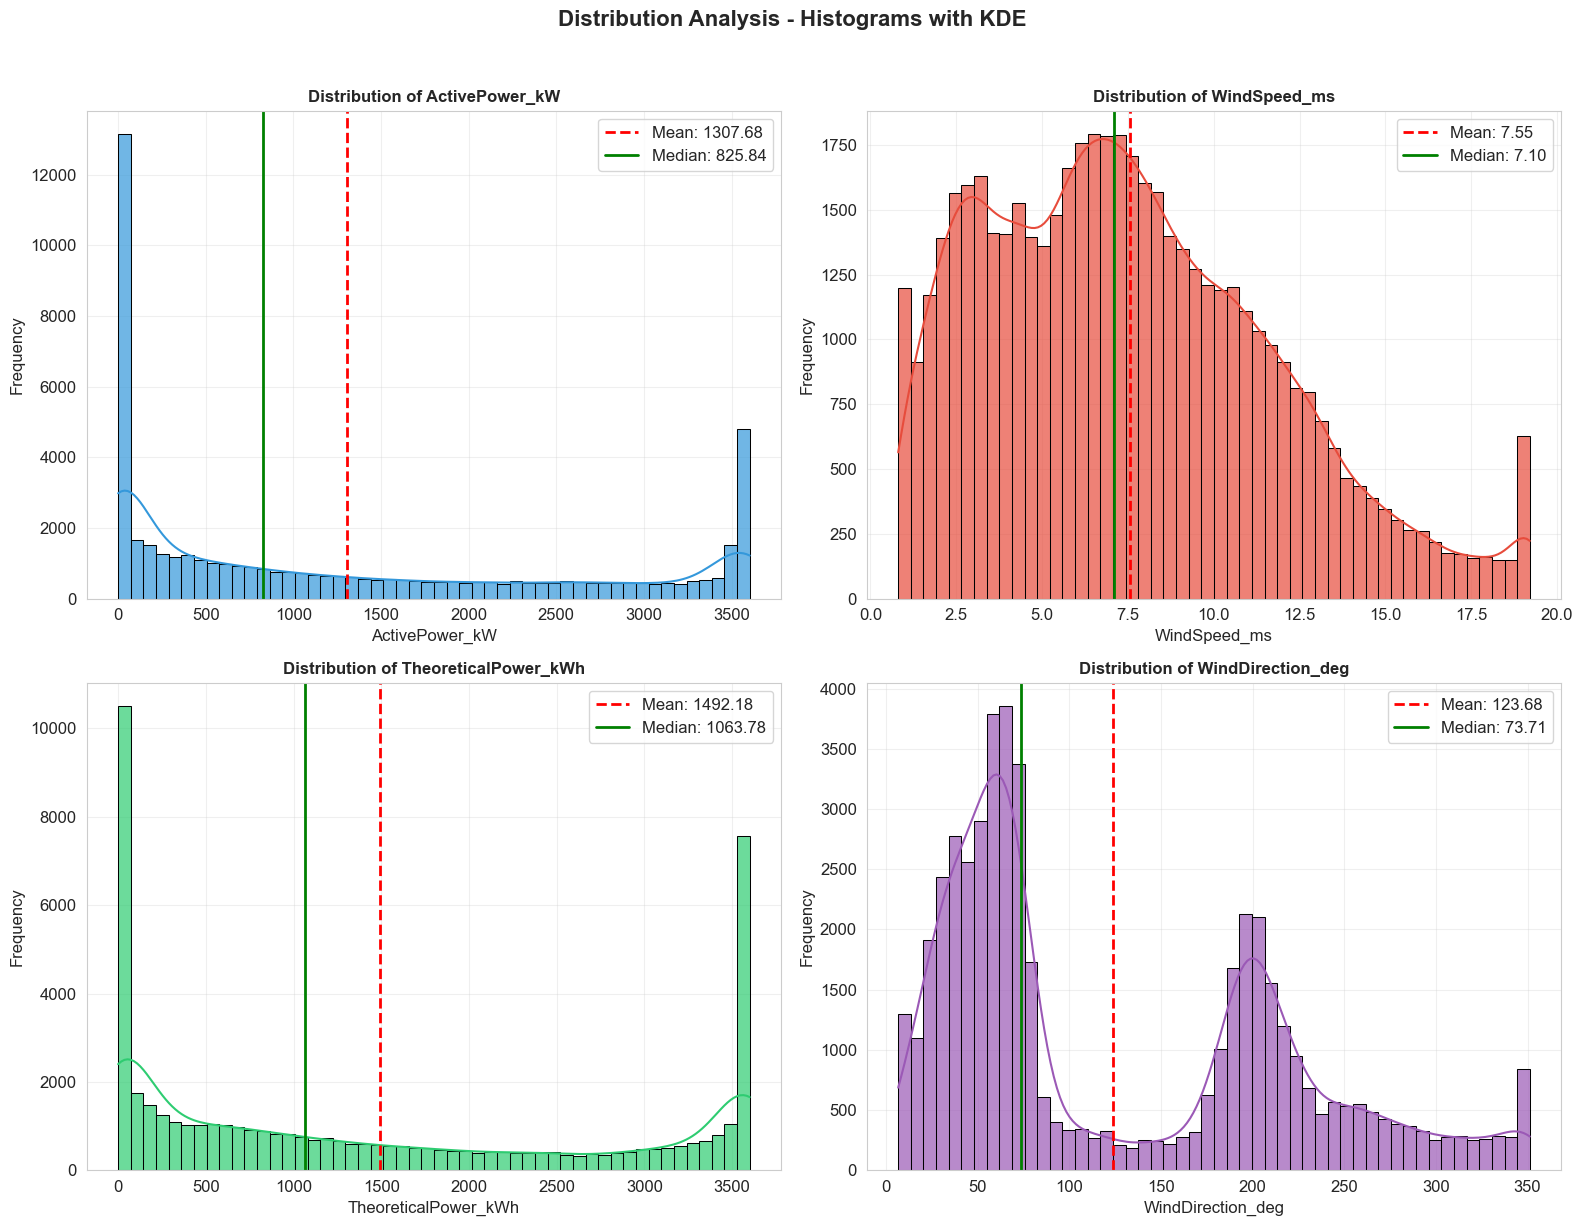

In [21]:
# ============================================================================
# DISTRIBUTION VISUALIZATION - HISTOGRAMS WITH KDE
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Plot histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=ax, color=colors[idx], 
                 edgecolor='black', alpha=0.7, bins=50)
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

plt.suptitle('Distribution Analysis - Histograms with KDE', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('distribution_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Exploratory Data Analysis (EDA)

In-depth exploration of relationships between variables:
- Wind Speed vs Power Output analysis
- Actual vs Theoretical Power comparison
- Wind Direction analysis
- Temporal pattern analysis

POWER CURVE ANALYSIS


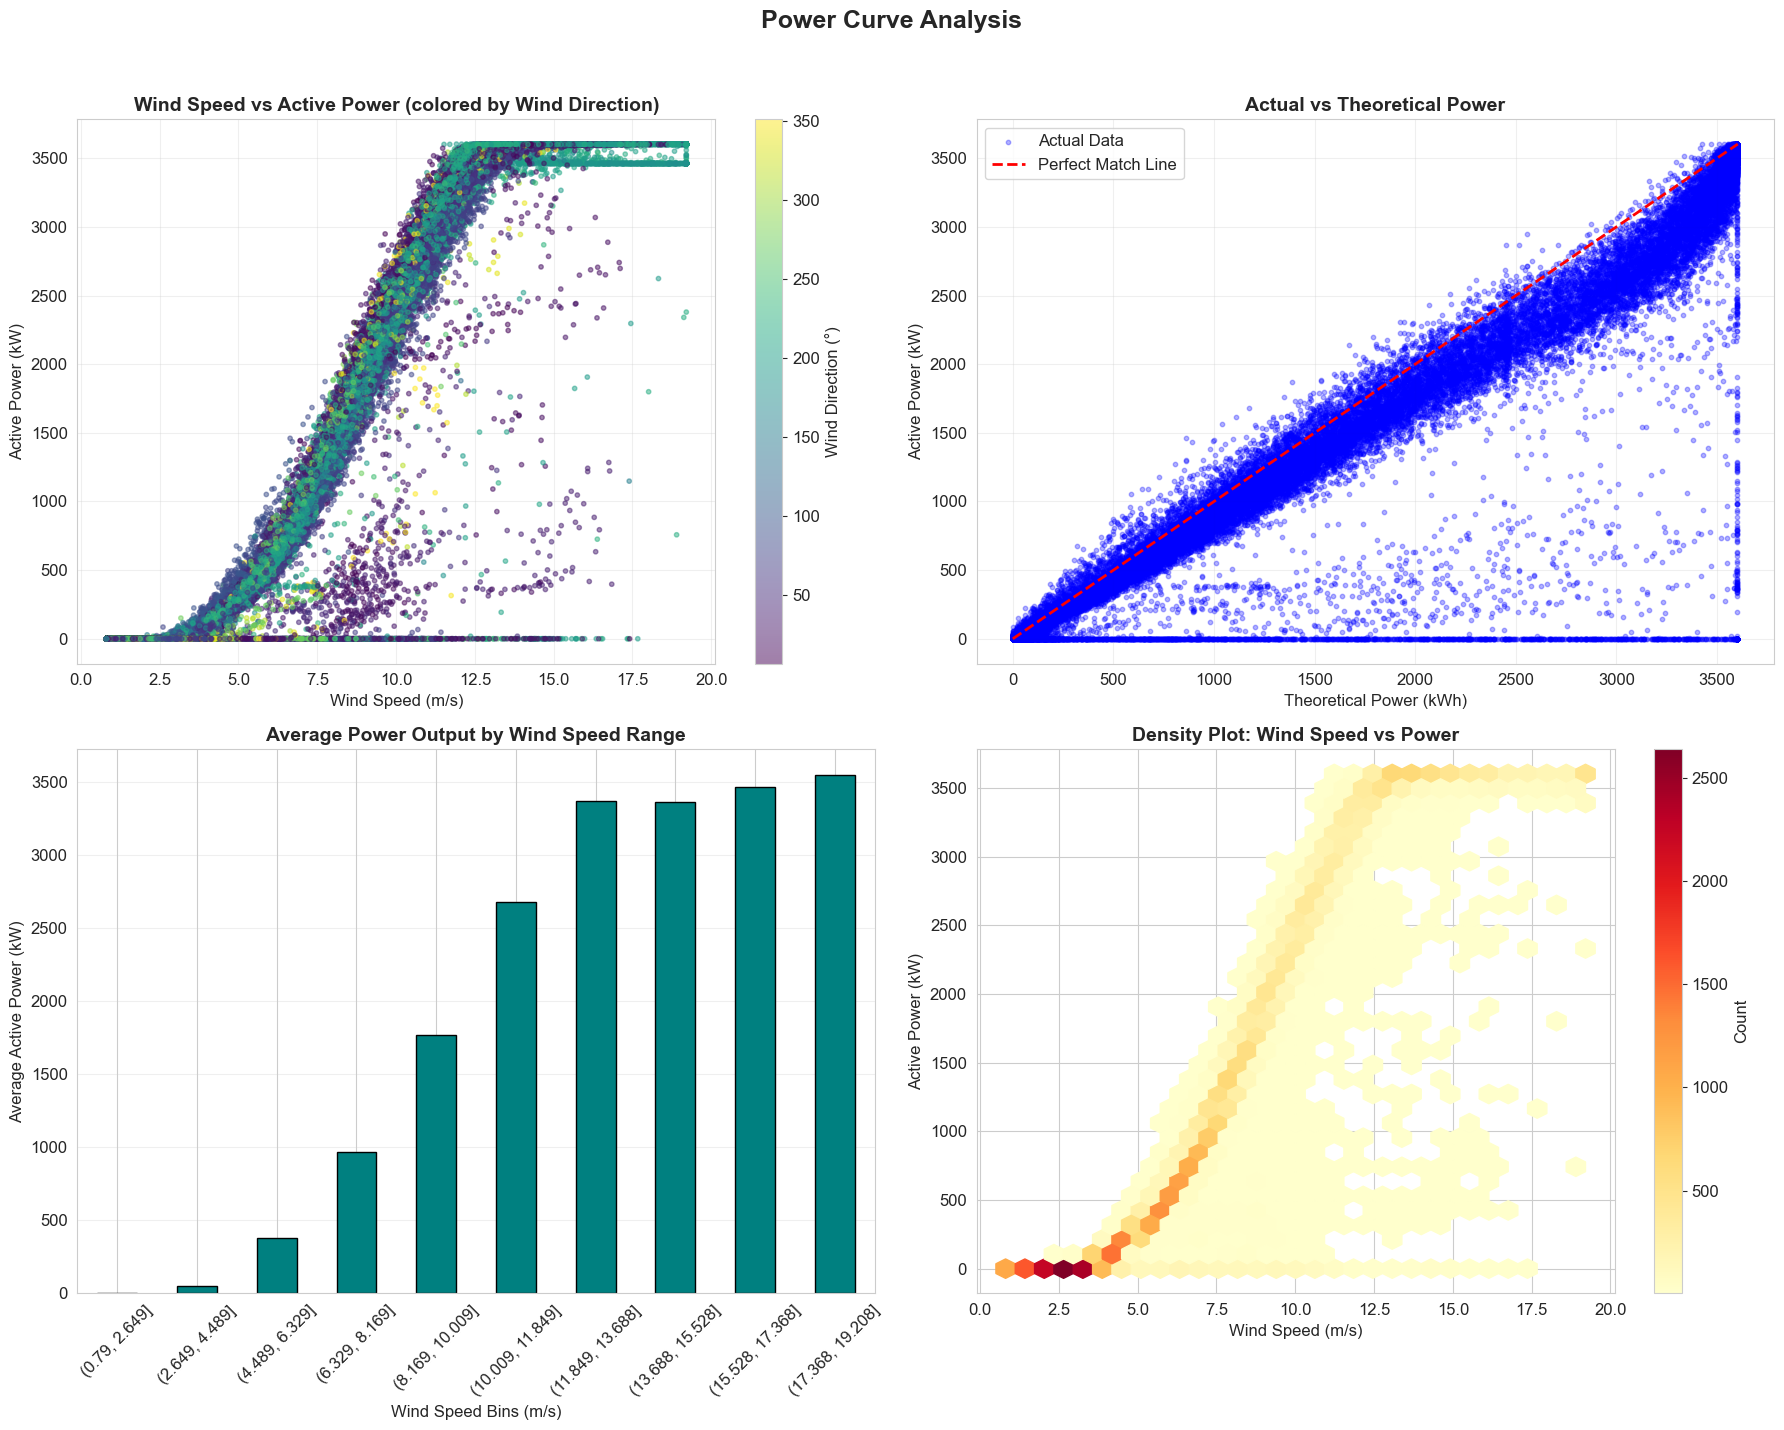

In [22]:
# ============================================================================
# POWER CURVE ANALYSIS - WIND SPEED VS ACTIVE POWER
# ============================================================================

print("=" * 80)
print("POWER CURVE ANALYSIS")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Plot 1: Scatter plot of Wind Speed vs Active Power
ax1 = axes[0, 0]
scatter = ax1.scatter(df['WindSpeed_ms'], df['ActivePower_kW'], 
                       c=df['WindDirection_deg'], cmap='viridis', 
                       alpha=0.5, s=10)
plt.colorbar(scatter, ax=ax1, label='Wind Direction (°)')
ax1.set_xlabel('Wind Speed (m/s)', fontsize=12)
ax1.set_ylabel('Active Power (kW)', fontsize=12)
ax1.set_title('Wind Speed vs Active Power (colored by Wind Direction)', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Actual vs Theoretical Power
ax2 = axes[0, 1]
ax2.scatter(df['TheoreticalPower_kWh'], df['ActivePower_kW'], 
            alpha=0.3, s=10, color='blue', label='Actual Data')
# Add diagonal reference line
max_val = max(df['TheoreticalPower_kWh'].max(), df['ActivePower_kW'].max())
ax2.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Perfect Match Line')
ax2.set_xlabel('Theoretical Power (kWh)', fontsize=12)
ax2.set_ylabel('Active Power (kW)', fontsize=12)
ax2.set_title('Actual vs Theoretical Power', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Power Output by Wind Speed bins
ax3 = axes[1, 0]
df['WindSpeed_Bin'] = pd.cut(df['WindSpeed_ms'], bins=10)
wind_power_by_bin = df.groupby('WindSpeed_Bin')['ActivePower_kW'].mean()
wind_power_by_bin.plot(kind='bar', ax=ax3, color='teal', edgecolor='black')
ax3.set_xlabel('Wind Speed Bins (m/s)', fontsize=12)
ax3.set_ylabel('Average Active Power (kW)', fontsize=12)
ax3.set_title('Average Power Output by Wind Speed Range', fontsize=14, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Hexbin plot for density
ax4 = axes[1, 1]
hb = ax4.hexbin(df['WindSpeed_ms'], df['ActivePower_kW'], gridsize=30, 
                cmap='YlOrRd', mincnt=1)
plt.colorbar(hb, ax=ax4, label='Count')
ax4.set_xlabel('Wind Speed (m/s)', fontsize=12)
ax4.set_ylabel('Active Power (kW)', fontsize=12)
ax4.set_title('Density Plot: Wind Speed vs Power', fontsize=14, fontweight='bold')

plt.suptitle('Power Curve Analysis', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('power_curve_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
# ============================================================================
# PERFORMANCE EFFICIENCY ANALYSIS
# ============================================================================

print("=" * 80)
print("PERFORMANCE EFFICIENCY ANALYSIS")
print("=" * 80)

# Calculate efficiency metrics
df['Efficiency'] = np.where(df['TheoreticalPower_kWh'] > 0, 
                            (df['ActivePower_kW'] / df['TheoreticalPower_kWh']) * 100, 
                            0)

# Cap efficiency at reasonable values
df['Efficiency'] = df['Efficiency'].clip(0, 150)

# Calculate power difference
df['PowerDifference'] = df['ActivePower_kW'] - df['TheoreticalPower_kWh']

# Efficiency statistics
print("\nEfficiency Statistics:")
print("-" * 50)
print(f"Mean Efficiency: {df['Efficiency'].mean():.2f}%")
print(f"Median Efficiency: {df['Efficiency'].median():.2f}%")
print(f"Std Dev: {df['Efficiency'].std():.2f}%")
print(f"Min Efficiency: {df['Efficiency'].min():.2f}%")
print(f"Max Efficiency: {df['Efficiency'].max():.2f}%")

# Power Difference Statistics
print("\nPower Difference Statistics (Actual - Theoretical):")
print("-" * 50)
print(f"Mean Difference: {df['PowerDifference'].mean():.2f} kW")
print(f"Median Difference: {df['PowerDifference'].median():.2f} kW")
print(f"Std Dev: {df['PowerDifference'].std():.2f} kW")

# Count underperforming vs overperforming
underperforming = (df['PowerDifference'] < 0).sum()
overperforming = (df['PowerDifference'] > 0).sum()
at_target = (df['PowerDifference'] == 0).sum()

print(f"\nPerformance Categories:")
print(f"  Underperforming: {underperforming} ({underperforming/len(df)*100:.2f}%)")
print(f"  Overperforming: {overperforming} ({overperforming/len(df)*100:.2f}%)")
print(f"  At Target: {at_target} ({at_target/len(df)*100:.2f}%)")

PERFORMANCE EFFICIENCY ANALYSIS

Efficiency Statistics:
--------------------------------------------------
Mean Efficiency: 68.43%
Median Efficiency: 85.92%
Std Dev: 39.97%
Min Efficiency: 0.00%
Max Efficiency: 150.00%

Power Difference Statistics (Actual - Theoretical):
--------------------------------------------------
Mean Difference: -184.50 kW
Median Difference: -66.68 kW
Std Dev: 427.70 kW

Performance Categories:
  Underperforming: 36021 (71.29%)
  Overperforming: 7185 (14.22%)
  At Target: 7324 (14.49%)


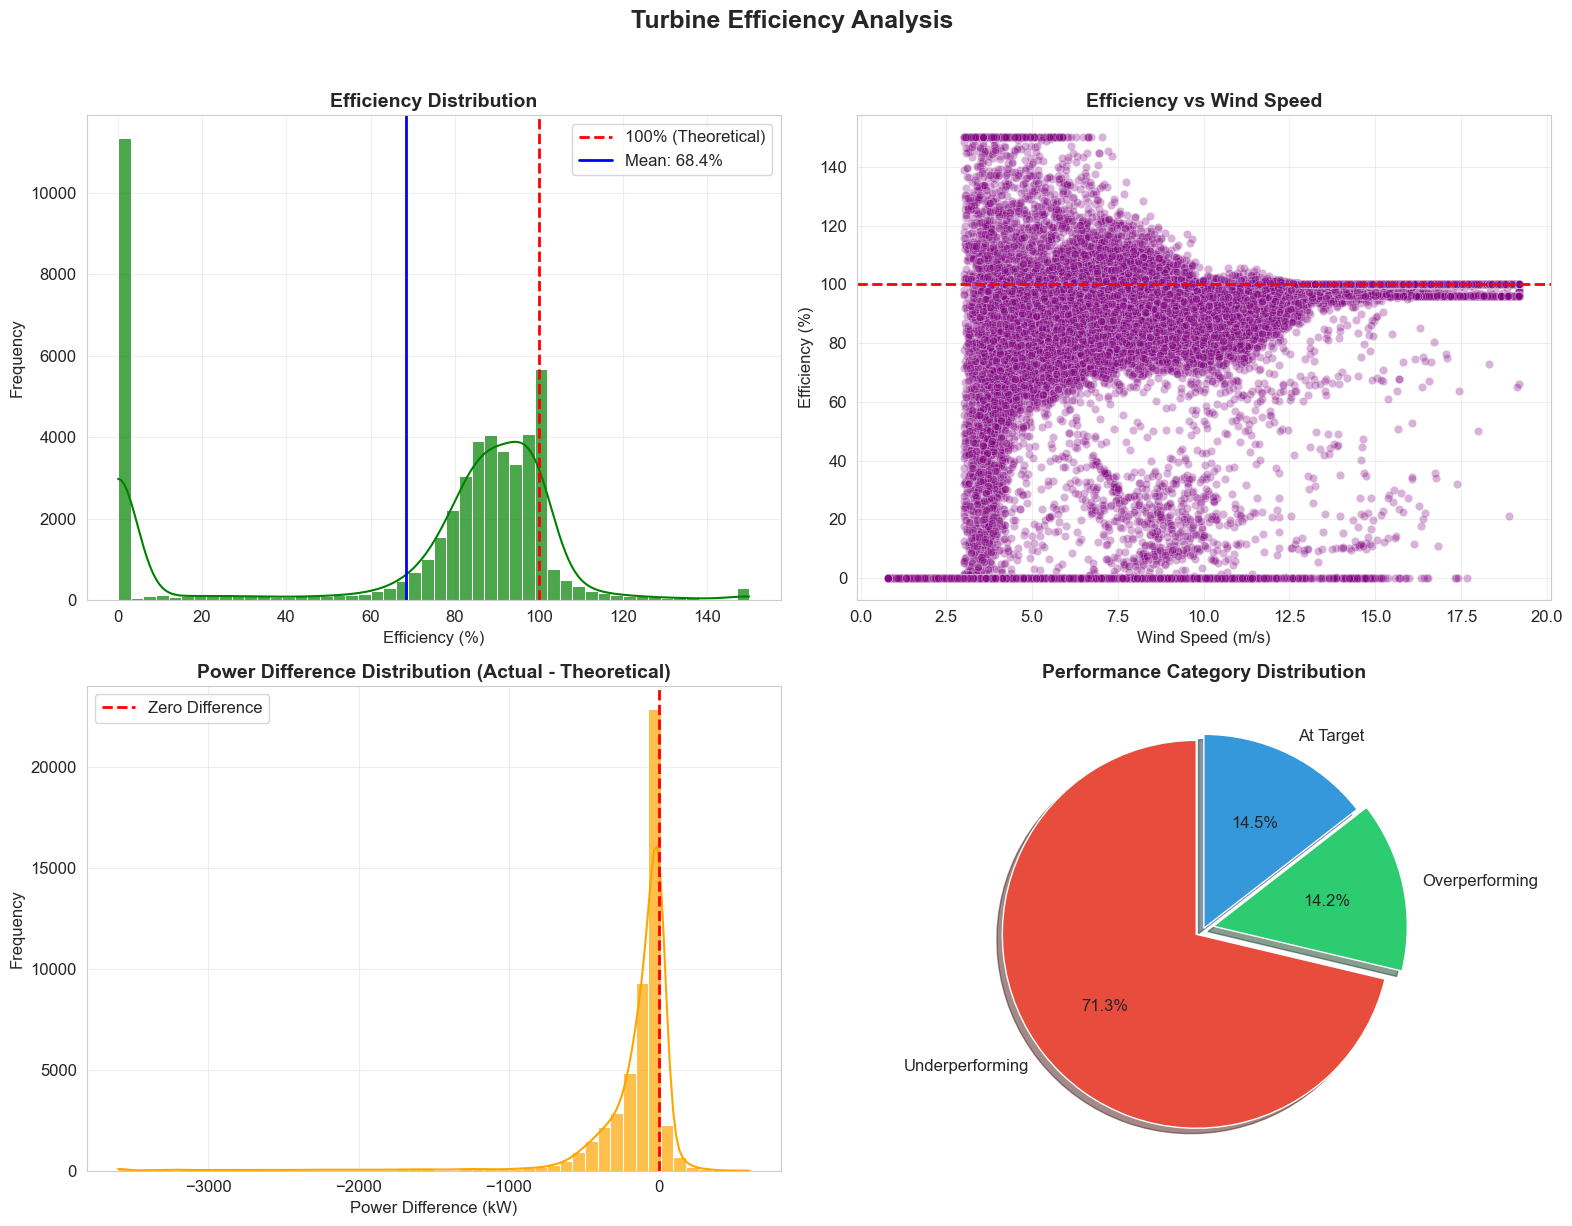

In [24]:
# ============================================================================
# EFFICIENCY VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Efficiency Distribution
ax1 = axes[0, 0]
sns.histplot(df['Efficiency'], bins=50, kde=True, ax=ax1, color='green', alpha=0.7)
ax1.axvline(100, color='red', linestyle='--', linewidth=2, label='100% (Theoretical)')
ax1.axvline(df['Efficiency'].mean(), color='blue', linestyle='-', linewidth=2, 
            label=f'Mean: {df["Efficiency"].mean():.1f}%')
ax1.set_xlabel('Efficiency (%)')
ax1.set_ylabel('Frequency')
ax1.set_title('Efficiency Distribution', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Efficiency vs Wind Speed
ax2 = axes[0, 1]
sns.scatterplot(data=df, x='WindSpeed_ms', y='Efficiency', alpha=0.3, ax=ax2, color='purple')
ax2.axhline(100, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Wind Speed (m/s)')
ax2.set_ylabel('Efficiency (%)')
ax2.set_title('Efficiency vs Wind Speed', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Power Difference Distribution
ax3 = axes[1, 0]
sns.histplot(df['PowerDifference'], bins=50, kde=True, ax=ax3, color='orange', alpha=0.7)
ax3.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Difference')
ax3.set_xlabel('Power Difference (kW)')
ax3.set_ylabel('Frequency')
ax3.set_title('Power Difference Distribution (Actual - Theoretical)', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Performance Category Pie Chart
ax4 = axes[1, 1]
performance_counts = [underperforming, overperforming, at_target]
labels = ['Underperforming', 'Overperforming', 'At Target']
colors_pie = ['#e74c3c', '#2ecc71', '#3498db']
explode = (0.05, 0.05, 0)
ax4.pie(performance_counts, labels=labels, colors=colors_pie, explode=explode,
        autopct='%1.1f%%', startangle=90, shadow=True)
ax4.set_title('Performance Category Distribution', fontsize=14, fontweight='bold')

plt.suptitle('Turbine Efficiency Analysis', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('efficiency_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Temporal Analysis

Analysis of power generation patterns across different time dimensions:
- Hourly patterns
- Daily patterns
- Monthly trends
- Seasonal variations
- Weekend vs Weekday comparison

TEMPORAL ANALYSIS - HOURLY PATTERNS

Hourly Statistics:
      ActivePower_kW_mean  ActivePower_kW_std  ActivePower_kW_min  \
Hour                                                                
0                 1385.04             1351.92                0.00   
1                 1375.15             1338.73                0.00   
2                 1382.93             1355.98                0.00   
3                 1375.32             1354.52                0.00   
4                 1393.63             1362.31                0.00   
5                 1323.46             1334.09                0.00   
6                 1243.54             1316.50                0.00   
7                 1178.74             1305.14                0.00   
8                 1091.95             1257.58                0.00   
9                 1066.08             1242.37                0.00   
10                1056.42             1212.31                0.00   
11                1066.08             1198.47  

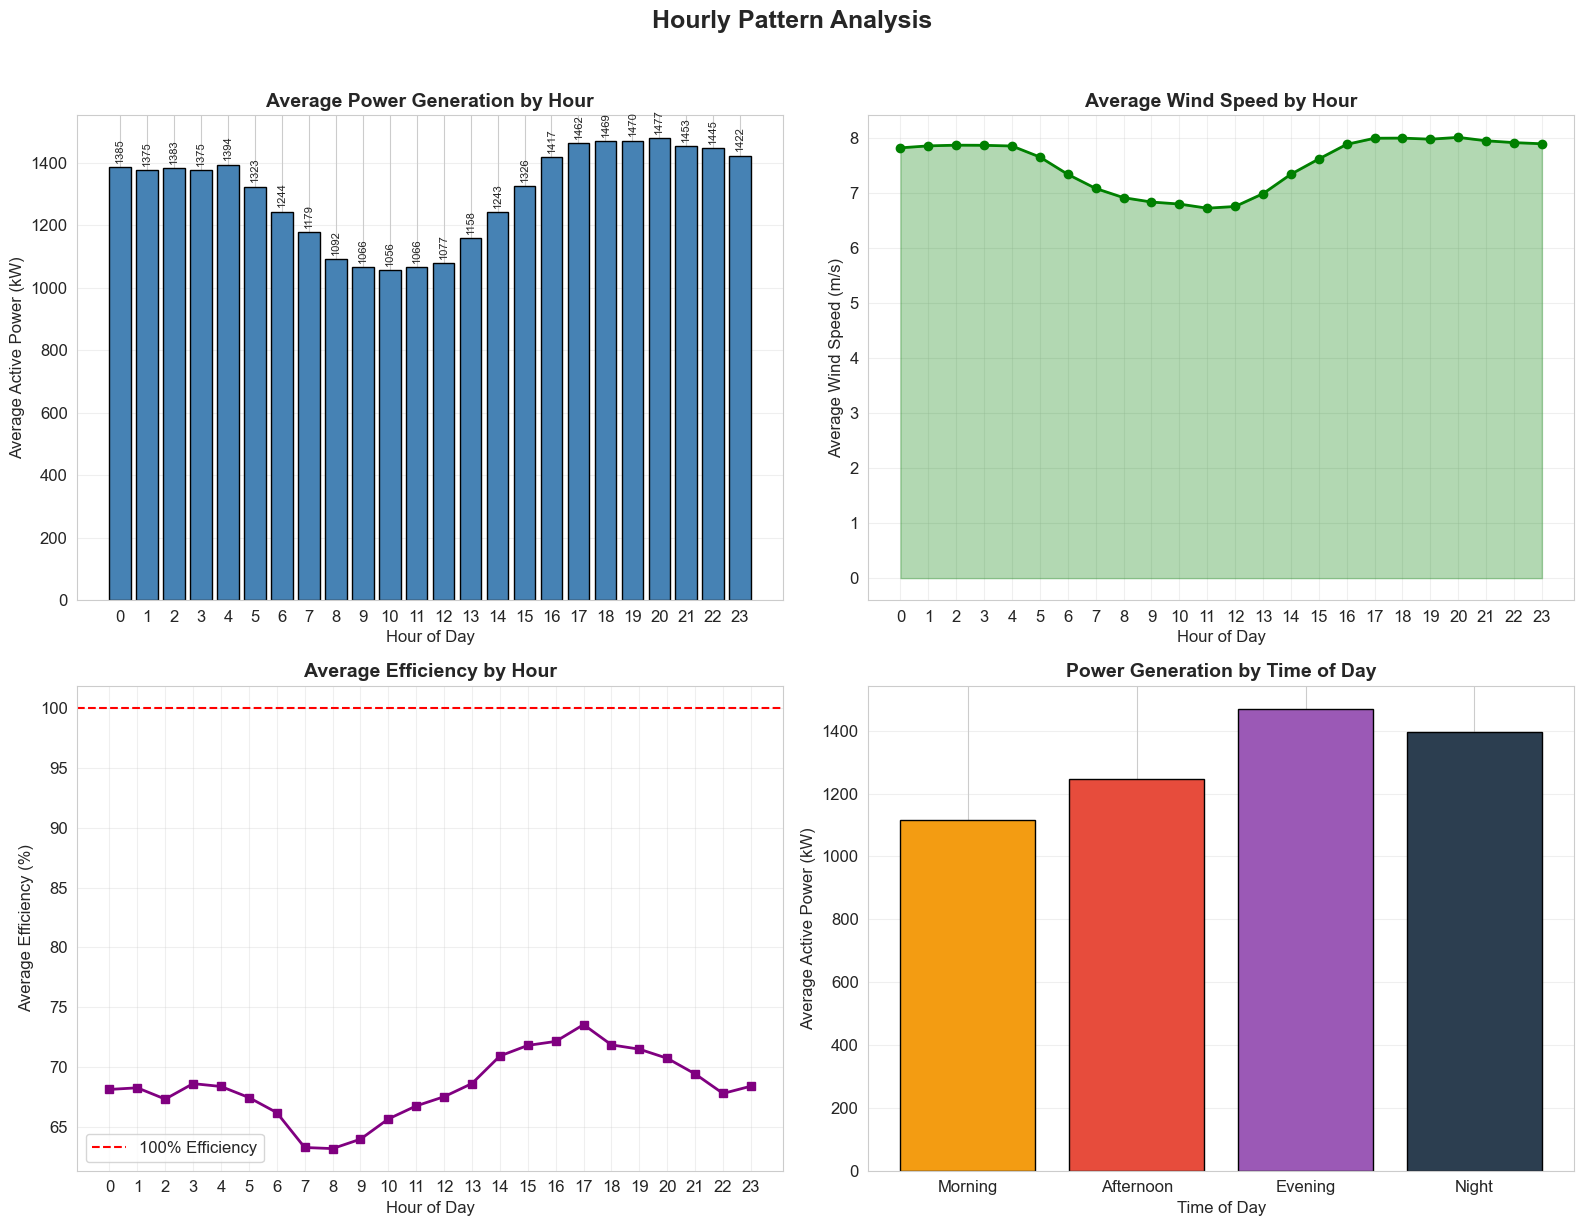

In [25]:
# ============================================================================
# HOURLY POWER GENERATION ANALYSIS
# ============================================================================

print("=" * 80)
print("TEMPORAL ANALYSIS - HOURLY PATTERNS")
print("=" * 80)

# Calculate hourly statistics
hourly_stats = df.groupby('Hour').agg({
    'ActivePower_kW': ['mean', 'std', 'min', 'max', 'count'],
    'WindSpeed_ms': ['mean', 'std'],
    'Efficiency': 'mean'
}).round(2)

hourly_stats.columns = ['_'.join(col).strip() for col in hourly_stats.columns.values]
print("\nHourly Statistics:")
print(hourly_stats)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Hourly Average Power
ax1 = axes[0, 0]
hourly_power = df.groupby('Hour')['ActivePower_kW'].mean()
bars = ax1.bar(hourly_power.index, hourly_power.values, color='steelblue', edgecolor='black')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Active Power (kW)')
ax1.set_title('Average Power Generation by Hour', fontsize=14, fontweight='bold')
ax1.set_xticks(range(24))
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom', fontsize=8, rotation=90)

# Plot 2: Hourly Wind Speed
ax2 = axes[0, 1]
hourly_wind = df.groupby('Hour')['WindSpeed_ms'].mean()
ax2.plot(hourly_wind.index, hourly_wind.values, marker='o', color='green', linewidth=2)
ax2.fill_between(hourly_wind.index, hourly_wind.values, alpha=0.3, color='green')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Average Wind Speed (m/s)')
ax2.set_title('Average Wind Speed by Hour', fontsize=14, fontweight='bold')
ax2.set_xticks(range(24))
ax2.grid(True, alpha=0.3)

# Plot 3: Hourly Efficiency
ax3 = axes[1, 0]
hourly_eff = df.groupby('Hour')['Efficiency'].mean()
ax3.plot(hourly_eff.index, hourly_eff.values, marker='s', color='purple', linewidth=2)
ax3.axhline(100, color='red', linestyle='--', label='100% Efficiency')
ax3.set_xlabel('Hour of Day')
ax3.set_ylabel('Average Efficiency (%)')
ax3.set_title('Average Efficiency by Hour', fontsize=14, fontweight='bold')
ax3.set_xticks(range(24))
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Time of Day comparison
ax4 = axes[1, 1]
tod_power = df.groupby('TimeOfDay')['ActivePower_kW'].mean()
tod_order = ['Morning', 'Afternoon', 'Evening', 'Night']
tod_power = tod_power.reindex(tod_order)
colors_tod = ['#f39c12', '#e74c3c', '#9b59b6', '#2c3e50']
ax4.bar(tod_power.index, tod_power.values, color=colors_tod, edgecolor='black')
ax4.set_xlabel('Time of Day')
ax4.set_ylabel('Average Active Power (kW)')
ax4.set_title('Power Generation by Time of Day', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

plt.suptitle('Hourly Pattern Analysis', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('hourly_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

DAILY AND WEEKLY PATTERN ANALYSIS

Daily Statistics:
           ActivePower_kW  WindSpeed_ms  Efficiency
DayName                                            
Monday            1230.73          7.26       68.47
Tuesday           1309.73          7.65       69.74
Wednesday         1245.28          7.54       64.44
Thursday          1259.07          7.37       66.12
Friday            1314.92          7.38       69.73
Saturday          1450.17          7.95       71.17
Sunday            1347.09          7.70       69.50


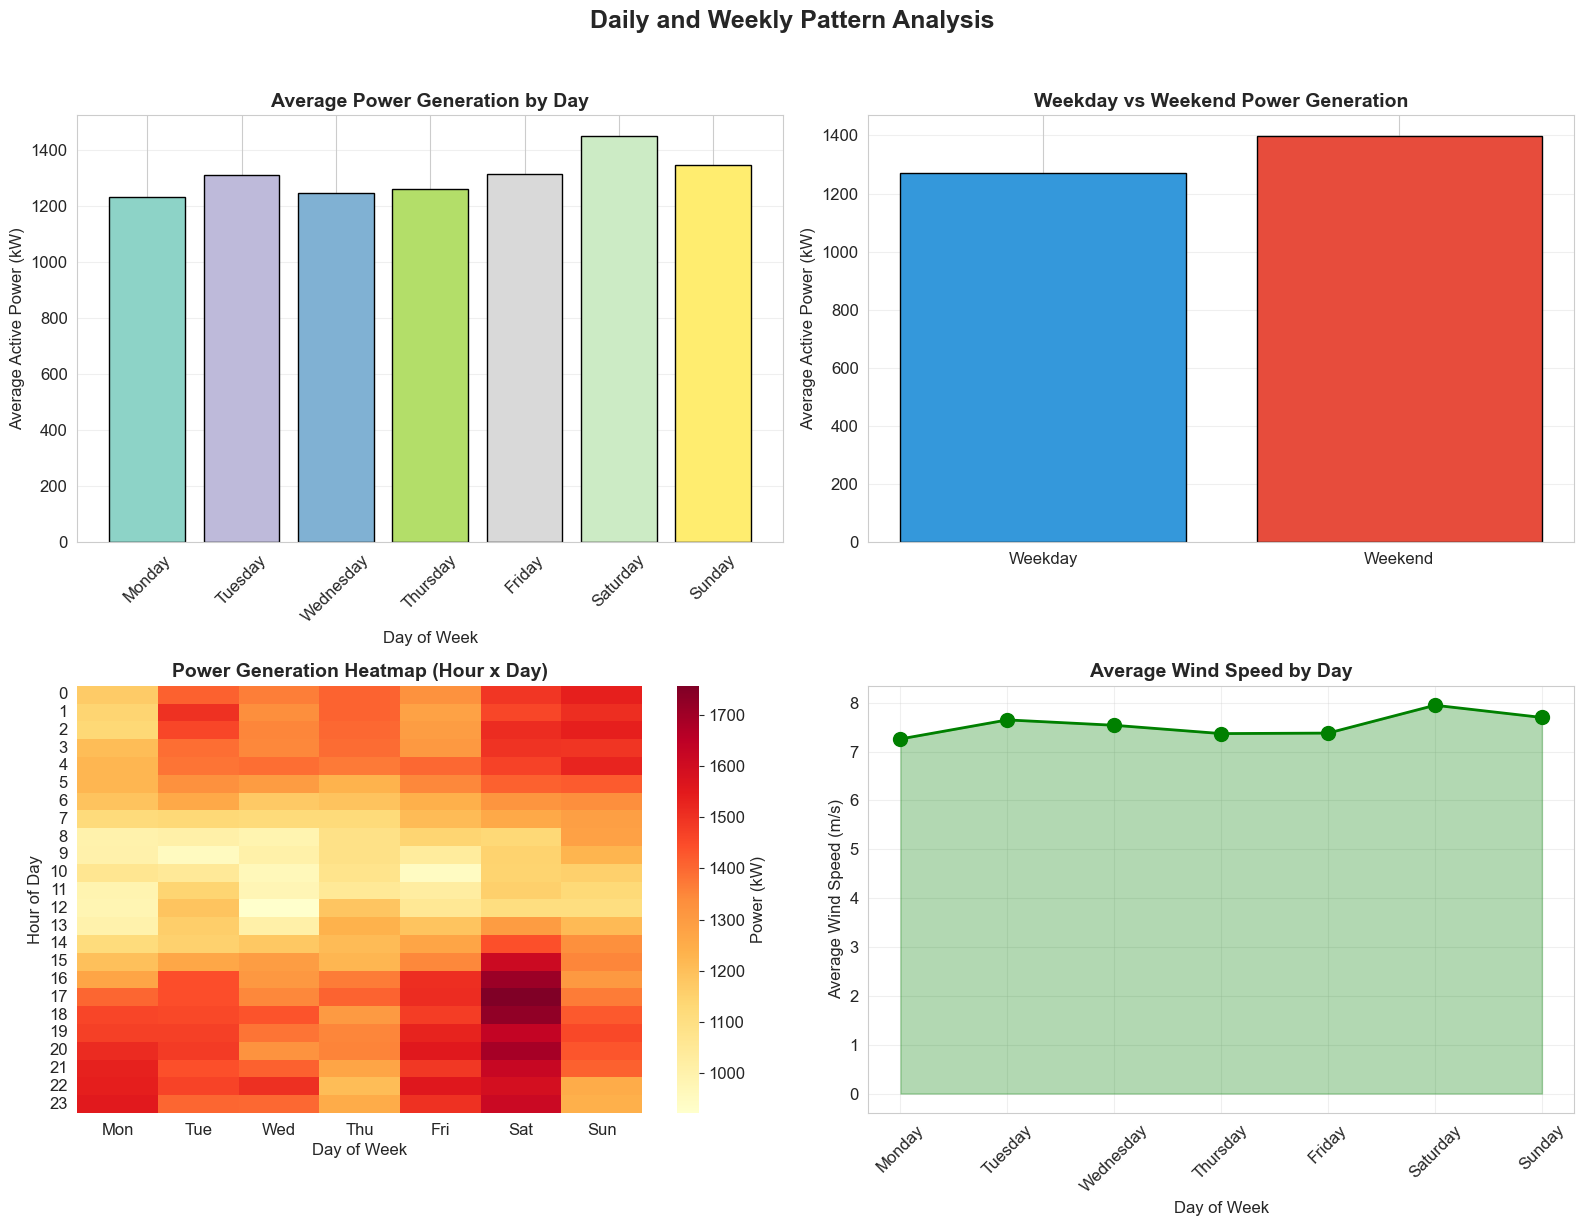

In [26]:
# ============================================================================
# DAILY AND WEEKLY PATTERN ANALYSIS
# ============================================================================

print("=" * 80)
print("DAILY AND WEEKLY PATTERN ANALYSIS")
print("=" * 80)

# Daily statistics
daily_stats = df.groupby('DayName').agg({
    'ActivePower_kW': 'mean',
    'WindSpeed_ms': 'mean',
    'Efficiency': 'mean'
}).round(2)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_stats = daily_stats.reindex(day_order)
print("\nDaily Statistics:")
print(daily_stats)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Power by Day of Week
ax1 = axes[0, 0]
colors_day = plt.cm.Set3(np.linspace(0, 1, 7))
bars = ax1.bar(daily_stats.index, daily_stats['ActivePower_kW'], color=colors_day, edgecolor='black')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Average Active Power (kW)')
ax1.set_title('Average Power Generation by Day', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Weekend vs Weekday comparison
ax2 = axes[0, 1]
weekend_stats = df.groupby('IsWeekend').agg({
    'ActivePower_kW': ['mean', 'std'],
    'WindSpeed_ms': 'mean'
}).round(2)
weekend_labels = ['Weekday', 'Weekend']
weekend_power = [weekend_stats.iloc[0][('ActivePower_kW', 'mean')], 
                  weekend_stats.iloc[1][('ActivePower_kW', 'mean')]]
ax2.bar(weekend_labels, weekend_power, color=['#3498db', '#e74c3c'], edgecolor='black')
ax2.set_ylabel('Average Active Power (kW)')
ax2.set_title('Weekday vs Weekend Power Generation', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Heatmap of Hour vs Day
ax3 = axes[1, 0]
pivot_table = df.pivot_table(values='ActivePower_kW', index='Hour', 
                              columns='DayOfWeek', aggfunc='mean')
pivot_table.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.heatmap(pivot_table, cmap='YlOrRd', annot=False, ax=ax3, cbar_kws={'label': 'Power (kW)'})
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('Hour of Day')
ax3.set_title('Power Generation Heatmap (Hour x Day)', fontsize=14, fontweight='bold')

# Plot 4: Wind Speed by Day
ax4 = axes[1, 1]
ax4.plot(daily_stats.index, daily_stats['WindSpeed_ms'], marker='o', 
         linewidth=2, markersize=10, color='green')
ax4.fill_between(daily_stats.index, daily_stats['WindSpeed_ms'], alpha=0.3, color='green')
ax4.set_xlabel('Day of Week')
ax4.set_ylabel('Average Wind Speed (m/s)')
ax4.set_title('Average Wind Speed by Day', fontsize=14, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.suptitle('Daily and Weekly Pattern Analysis', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('daily_weekly_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

MONTHLY AND SEASONAL ANALYSIS

Monthly Statistics:
      ActivePower_kW                    WindSpeed_ms Efficiency
                mean     std        sum         mean       mean
Month                                                          
1            1323.15 1416.63 5050456.54         8.54      61.02
2            1503.36 1427.41 6061531.04         8.53      69.79
3            1952.39 1461.61 8713524.41         9.71      77.70
4             824.35 1193.64 3548831.50         5.85      52.50
5             836.94  967.62 3723554.62         5.86      62.26
6             995.48 1090.06 4225833.78         6.35      63.76
7             477.01  623.40 2129392.73         4.95      55.69
8            1978.18 1183.49 8753445.96         9.34      84.56
9            1429.48 1343.05 5717930.74         7.58      73.66
10           1408.27 1180.91 5749972.35         7.54      78.88
11           1886.69 1269.79 7169435.54         9.37      87.09
12           1176.79 1374.22 5233170.26         7.35 

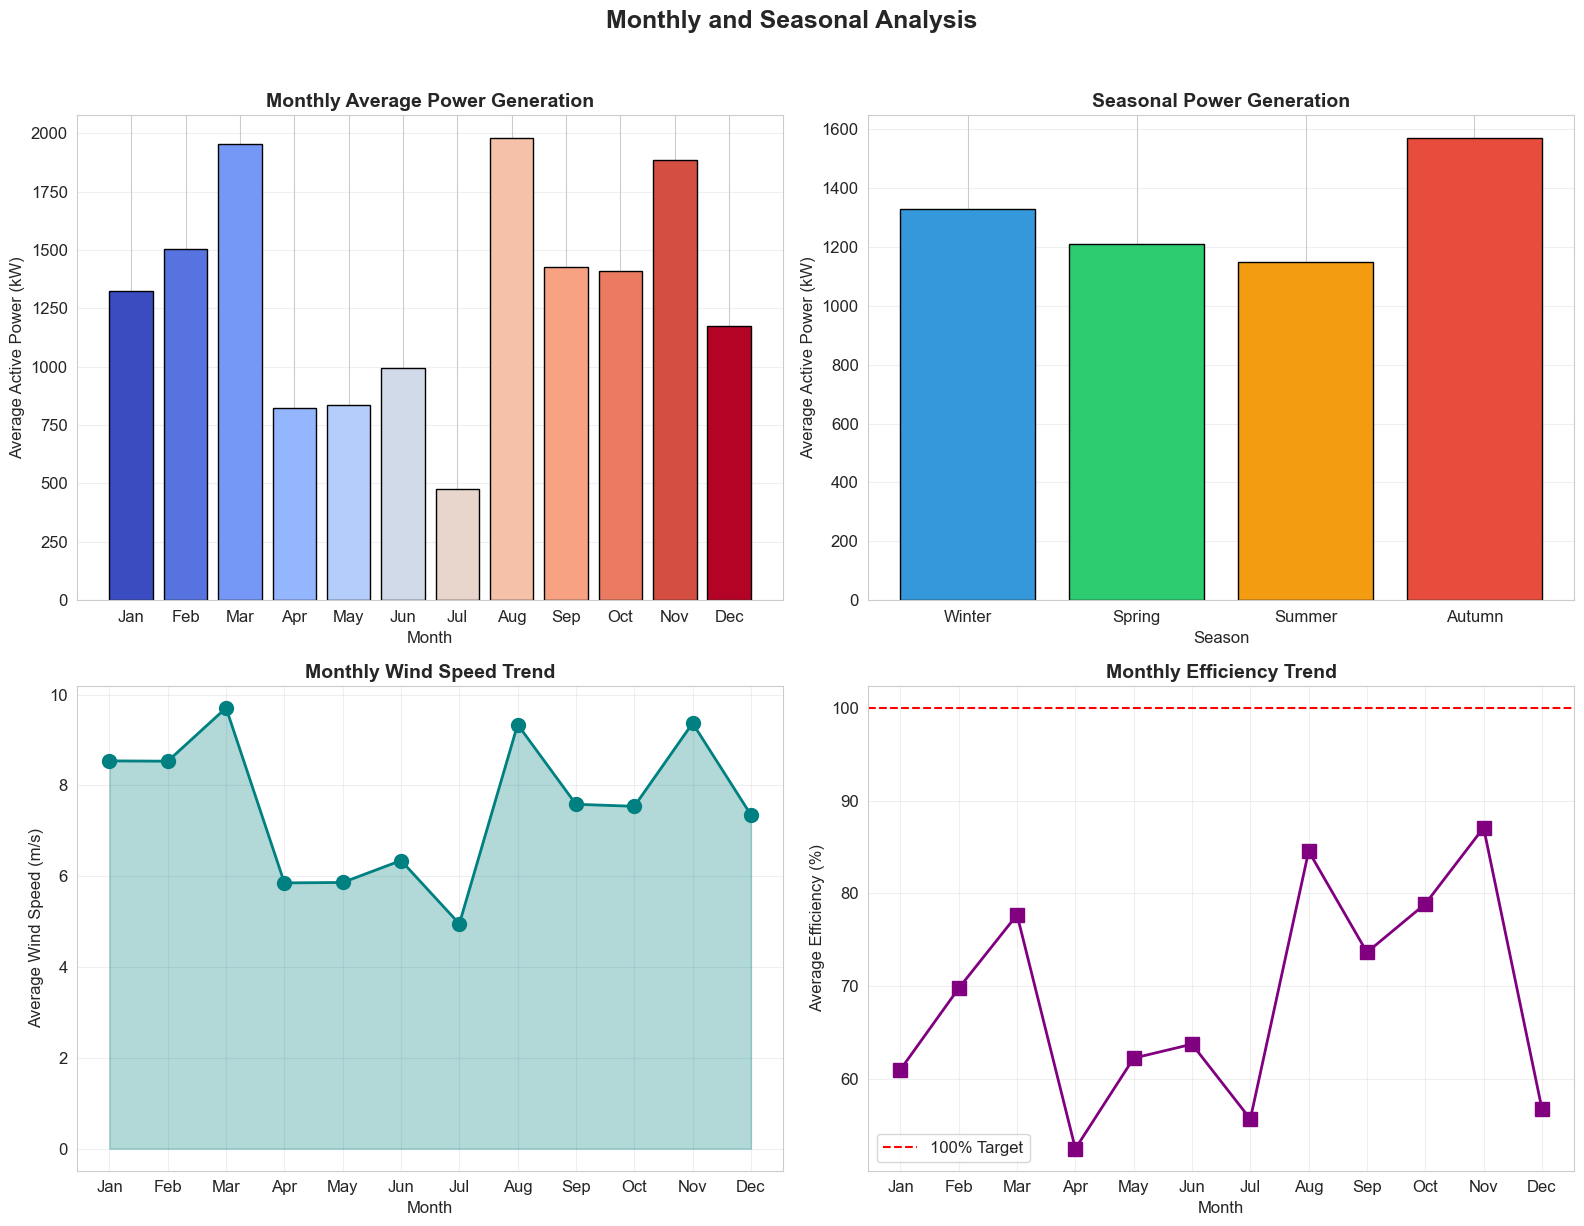

In [27]:
# ============================================================================
# MONTHLY AND SEASONAL ANALYSIS
# ============================================================================

print("=" * 80)
print("MONTHLY AND SEASONAL ANALYSIS")
print("=" * 80)

# Monthly statistics
monthly_stats = df.groupby('Month').agg({
    'ActivePower_kW': ['mean', 'std', 'sum'],
    'WindSpeed_ms': 'mean',
    'Efficiency': 'mean'
}).round(2)

print("\nMonthly Statistics:")
print(monthly_stats)

# Seasonal statistics
seasonal_stats = df.groupby('Season').agg({
    'ActivePower_kW': ['mean', 'std', 'count'],
    'WindSpeed_ms': 'mean',
    'Efficiency': 'mean'
}).round(2)

print("\nSeasonal Statistics:")
print(seasonal_stats)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Monthly Power Generation
ax1 = axes[0, 0]
monthly_power = df.groupby('Month')['ActivePower_kW'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors_month = plt.cm.coolwarm(np.linspace(0, 1, 12))
ax1.bar(range(1, 13), monthly_power.values, color=colors_month, edgecolor='black')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(months)
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Active Power (kW)')
ax1.set_title('Monthly Average Power Generation', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Seasonal Power Generation
ax2 = axes[0, 1]
season_power = df.groupby('Season')['ActivePower_kW'].mean()
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
season_power = season_power.reindex(season_order)
colors_season = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']
ax2.bar(season_power.index, season_power.values, color=colors_season, edgecolor='black')
ax2.set_xlabel('Season')
ax2.set_ylabel('Average Active Power (kW)')
ax2.set_title('Seasonal Power Generation', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Monthly Wind Speed Trend
ax3 = axes[1, 0]
monthly_wind = df.groupby('Month')['WindSpeed_ms'].mean()
ax3.plot(range(1, 13), monthly_wind.values, marker='o', linewidth=2, 
         markersize=10, color='teal')
ax3.fill_between(range(1, 13), monthly_wind.values, alpha=0.3, color='teal')
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(months)
ax3.set_xlabel('Month')
ax3.set_ylabel('Average Wind Speed (m/s)')
ax3.set_title('Monthly Wind Speed Trend', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Plot 4: Monthly Efficiency
ax4 = axes[1, 1]
monthly_eff = df.groupby('Month')['Efficiency'].mean()
ax4.plot(range(1, 13), monthly_eff.values, marker='s', linewidth=2, 
         markersize=10, color='purple')
ax4.axhline(100, color='red', linestyle='--', label='100% Target')
ax4.set_xticks(range(1, 13))
ax4.set_xticklabels(months)
ax4.set_xlabel('Month')
ax4.set_ylabel('Average Efficiency (%)')
ax4.set_title('Monthly Efficiency Trend', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.suptitle('Monthly and Seasonal Analysis', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('monthly_seasonal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Wind Direction Analysis

Comprehensive analysis of wind direction patterns and their impact on power generation using polar plots and directional statistics.

WIND DIRECTION ANALYSIS

Wind Direction Statistics:
                      ActivePower_kW        WindSpeed_ms Efficiency
                                mean  count         mean       mean
WindDirectionCategory                                              
E                             536.66   1855         4.74      59.24
ENE                          1581.24  11442         8.30      76.71
ESE                           221.34   1021         3.70      45.37
N                             644.05   1624         5.17      45.25
NE                           1357.02   9099         7.75      74.37
NNE                          1068.48   5608         7.15      66.08
NNW                           344.84    931         3.92      29.94
NW                            328.72    886         3.82      31.37
S                            2067.81   3088        10.32      81.23
SE                            364.10    710         4.10      38.79
SSE                           516.90    820         4.67      46

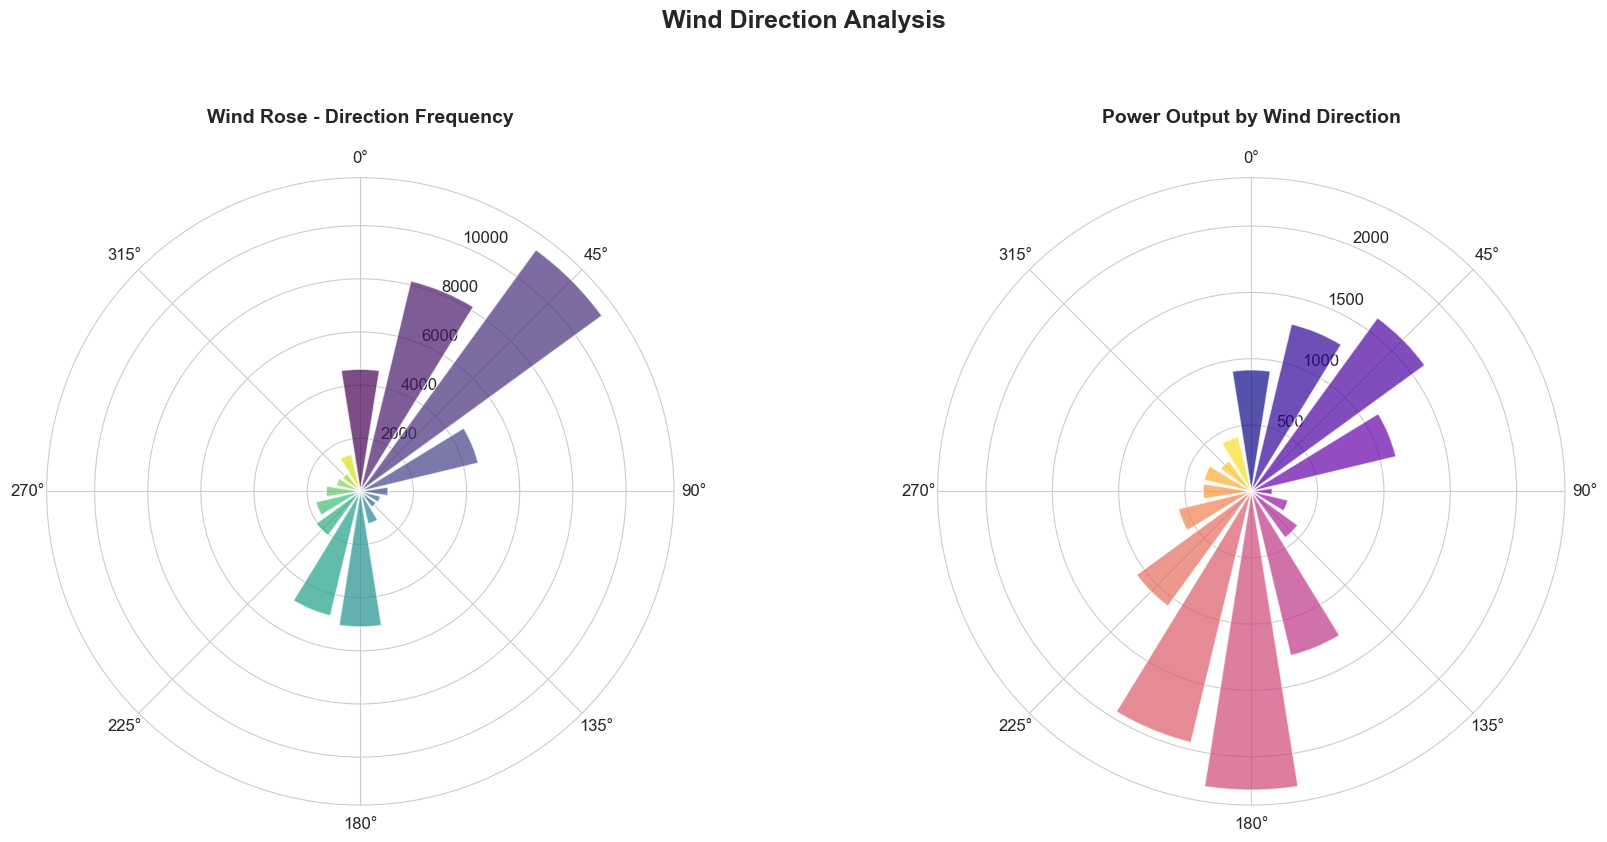

In [28]:
# ============================================================================
# WIND DIRECTION ANALYSIS
# ============================================================================

print("=" * 80)
print("WIND DIRECTION ANALYSIS")
print("=" * 80)

# Create wind direction categories
def categorize_direction(degrees):
    """Convert degrees to compass direction"""
    directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                  'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    idx = int((degrees + 11.25) / 22.5) % 16
    return directions[idx]

df['WindDirectionCategory'] = df['WindDirection_deg'].apply(categorize_direction)

# Direction statistics
direction_stats = df.groupby('WindDirectionCategory').agg({
    'ActivePower_kW': ['mean', 'count'],
    'WindSpeed_ms': 'mean',
    'Efficiency': 'mean'
}).round(2)

print("\nWind Direction Statistics:")
print(direction_stats)

# Create polar plots
fig = plt.figure(figsize=(18, 8))

# Plot 1: Wind Rose (Frequency)
ax1 = fig.add_subplot(121, projection='polar')
direction_counts = df['WindDirection_deg'].value_counts(bins=16, sort=False)
theta = np.linspace(0, 2*np.pi, 16, endpoint=False)
radii = direction_counts.values
width = 2*np.pi / 16 * 0.8
bars = ax1.bar(theta, radii, width=width, bottom=0.0, alpha=0.7)
for bar, angle in zip(bars, theta):
    bar.set_facecolor(plt.cm.viridis(angle / (2*np.pi)))
ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax1.set_title('Wind Rose - Direction Frequency', fontsize=14, fontweight='bold', pad=20)

# Plot 2: Power by Wind Direction
ax2 = fig.add_subplot(122, projection='polar')
direction_power = df.groupby(pd.cut(df['WindDirection_deg'], bins=16))['ActivePower_kW'].mean()
radii2 = direction_power.values
bars2 = ax2.bar(theta, radii2, width=width, bottom=0.0, alpha=0.7)
for bar, angle in zip(bars2, theta):
    bar.set_facecolor(plt.cm.plasma(angle / (2*np.pi)))
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.set_title('Power Output by Wind Direction', fontsize=14, fontweight='bold', pad=20)

plt.suptitle('Wind Direction Analysis', fontsize=18, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('wind_direction_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

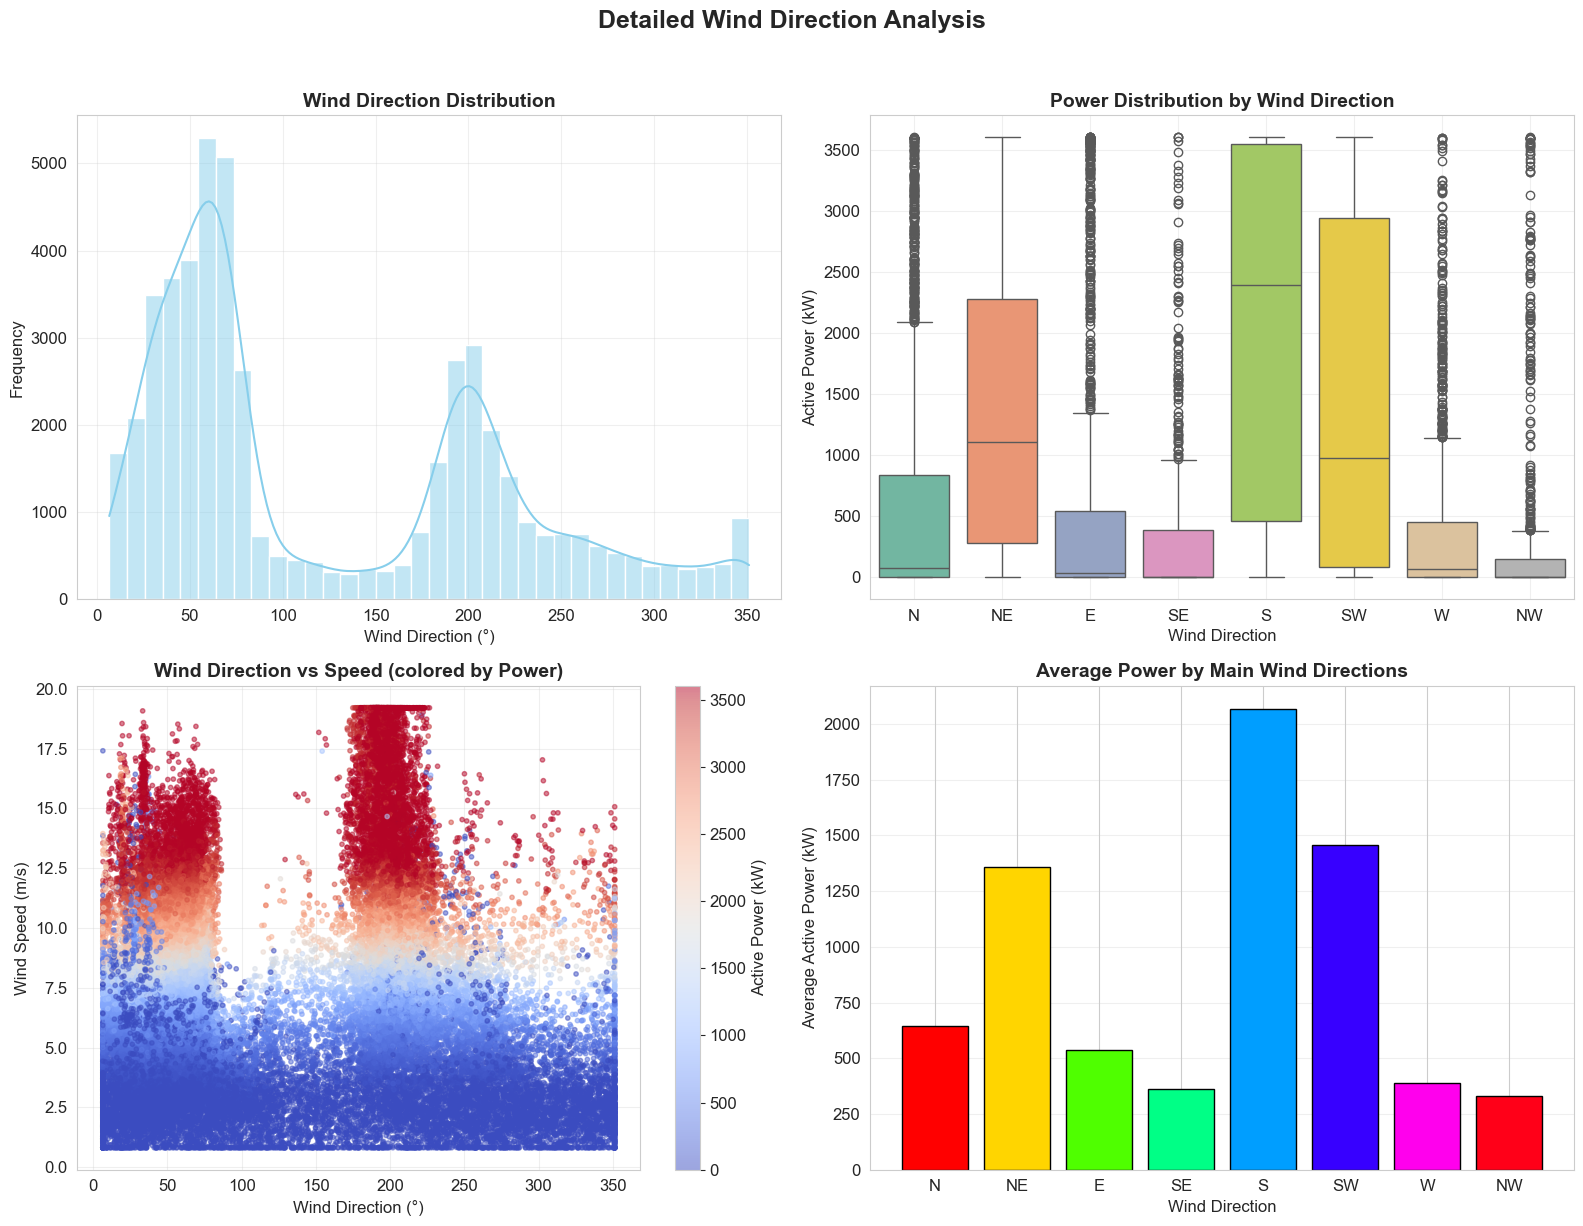

In [29]:
# ============================================================================
# WIND DIRECTION DETAILED VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Wind Direction Distribution
ax1 = axes[0, 0]
sns.histplot(df['WindDirection_deg'], bins=36, kde=True, ax=ax1, color='skyblue')
ax1.set_xlabel('Wind Direction (°)')
ax1.set_ylabel('Frequency')
ax1.set_title('Wind Direction Distribution', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Box plot of Power by Direction Category
ax2 = axes[0, 1]
direction_order = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
df_filtered = df[df['WindDirectionCategory'].isin(direction_order)]
sns.boxplot(data=df_filtered, x='WindDirectionCategory', y='ActivePower_kW', 
            order=direction_order, ax=ax2, palette='Set2')
ax2.set_xlabel('Wind Direction')
ax2.set_ylabel('Active Power (kW)')
ax2.set_title('Power Distribution by Wind Direction', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Wind Direction vs Wind Speed
ax3 = axes[1, 0]
scatter = ax3.scatter(df['WindDirection_deg'], df['WindSpeed_ms'], 
                       c=df['ActivePower_kW'], cmap='coolwarm', alpha=0.5, s=10)
plt.colorbar(scatter, ax=ax3, label='Active Power (kW)')
ax3.set_xlabel('Wind Direction (°)')
ax3.set_ylabel('Wind Speed (m/s)')
ax3.set_title('Wind Direction vs Speed (colored by Power)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Plot 4: Average Power by Main Directions
ax4 = axes[1, 1]
main_directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
main_dir_power = df[df['WindDirectionCategory'].isin(main_directions)].groupby('WindDirectionCategory')['ActivePower_kW'].mean()
main_dir_power = main_dir_power.reindex(main_directions)
colors_dir = plt.cm.hsv(np.linspace(0, 1, 8))
ax4.bar(main_dir_power.index, main_dir_power.values, color=colors_dir, edgecolor='black')
ax4.set_xlabel('Wind Direction')
ax4.set_ylabel('Average Active Power (kW)')
ax4.set_title('Average Power by Main Wind Directions', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

plt.suptitle('Detailed Wind Direction Analysis', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('wind_direction_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

## 10. Correlation Analysis

Statistical correlation analysis between all variables to identify significant relationships and dependencies.

In [30]:
# ============================================================================
# CORRELATION ANALYSIS
# ============================================================================

print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Select numerical columns for correlation
correlation_cols = ['ActivePower_kW', 'WindSpeed_ms', 'TheoreticalPower_kWh', 
                    'WindDirection_deg', 'Hour', 'Month', 'Efficiency']

# Calculate Pearson correlation
pearson_corr = df[correlation_cols].corr(method='pearson')
print("\nPearson Correlation Matrix:")
print(pearson_corr.round(3))

# Calculate Spearman correlation
spearman_corr = df[correlation_cols].corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr.round(3))

# Identify strong correlations
print("\n" + "=" * 80)
print("STRONG CORRELATIONS (|r| > 0.5)")
print("=" * 80)

for i in range(len(correlation_cols)):
    for j in range(i+1, len(correlation_cols)):
        corr_val = pearson_corr.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"{correlation_cols[i]} <-> {correlation_cols[j]}: {corr_val:.3f}")

CORRELATION ANALYSIS

Pearson Correlation Matrix:
                      ActivePower_kW  WindSpeed_ms  TheoreticalPower_kWh  \
ActivePower_kW                  1.00          0.92                  0.95   
WindSpeed_ms                    0.92          1.00                  0.95   
TheoreticalPower_kWh            0.95          0.95                  1.00   
WindDirection_deg              -0.06         -0.08                 -0.10   
Hour                            0.04          0.03                  0.04   
Month                           0.03         -0.01                  0.00   
Efficiency                      0.61          0.60                  0.52   

                      WindDirection_deg  Hour  Month  Efficiency  
ActivePower_kW                    -0.06  0.04   0.03        0.61  
WindSpeed_ms                      -0.08  0.03  -0.01        0.60  
TheoreticalPower_kWh              -0.10  0.04   0.00        0.52  
WindDirection_deg                  1.00 -0.01  -0.18       -0.15  
Hour  

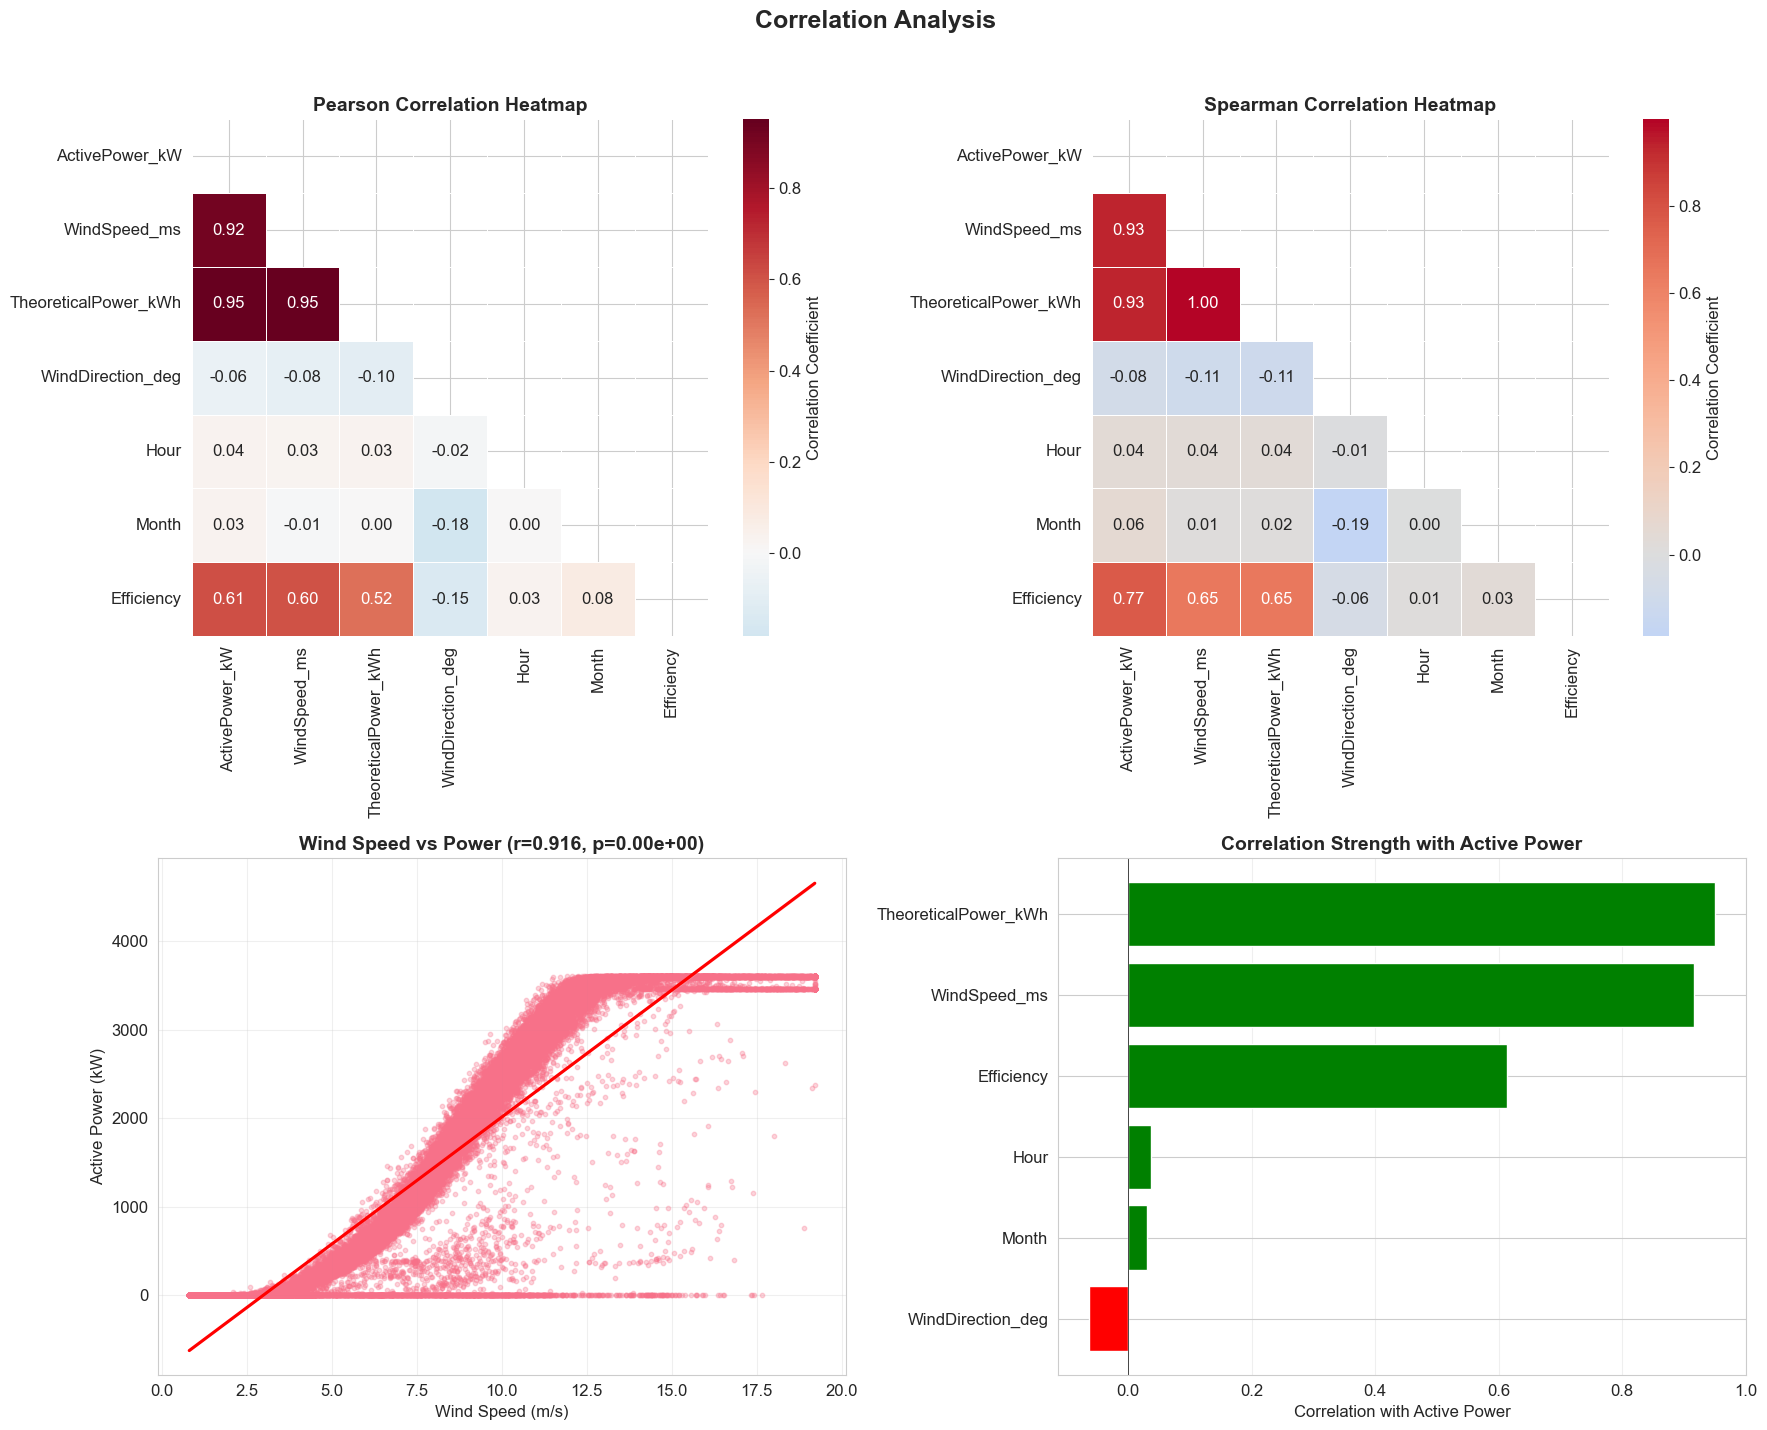

In [31]:
# ============================================================================
# CORRELATION VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Plot 1: Pearson Correlation Heatmap
ax1 = axes[0, 0]
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))
sns.heatmap(pearson_corr, mask=mask, annot=True, cmap='RdBu_r', center=0,
            fmt='.2f', ax=ax1, square=True, linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
ax1.set_title('Pearson Correlation Heatmap', fontsize=14, fontweight='bold')

# Plot 2: Spearman Correlation Heatmap
ax2 = axes[0, 1]
sns.heatmap(spearman_corr, mask=mask, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', ax=ax2, square=True, linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})
ax2.set_title('Spearman Correlation Heatmap', fontsize=14, fontweight='bold')

# Plot 3: Pairwise relationships - Wind Speed vs Power
ax3 = axes[1, 0]
sns.regplot(data=df, x='WindSpeed_ms', y='ActivePower_kW', ax=ax3,
            scatter_kws={'alpha': 0.3, 's': 10}, line_kws={'color': 'red'})
corr_val, p_val = pearsonr(df['WindSpeed_ms'].dropna(), df['ActivePower_kW'].dropna())
ax3.set_title(f'Wind Speed vs Power (r={corr_val:.3f}, p={p_val:.2e})', 
              fontsize=14, fontweight='bold')
ax3.set_xlabel('Wind Speed (m/s)')
ax3.set_ylabel('Active Power (kW)')
ax3.grid(True, alpha=0.3)

# Plot 4: Correlation strength bar chart
ax4 = axes[1, 1]
power_correlations = pearson_corr['ActivePower_kW'].drop('ActivePower_kW').sort_values()
colors_corr = ['red' if x < 0 else 'green' for x in power_correlations.values]
bars = ax4.barh(power_correlations.index, power_correlations.values, color=colors_corr)
ax4.axvline(0, color='black', linewidth=0.5)
ax4.set_xlabel('Correlation with Active Power')
ax4.set_title('Correlation Strength with Active Power', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

plt.suptitle('Correlation Analysis', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

GENERATING PAIR PLOT (This may take a moment...)


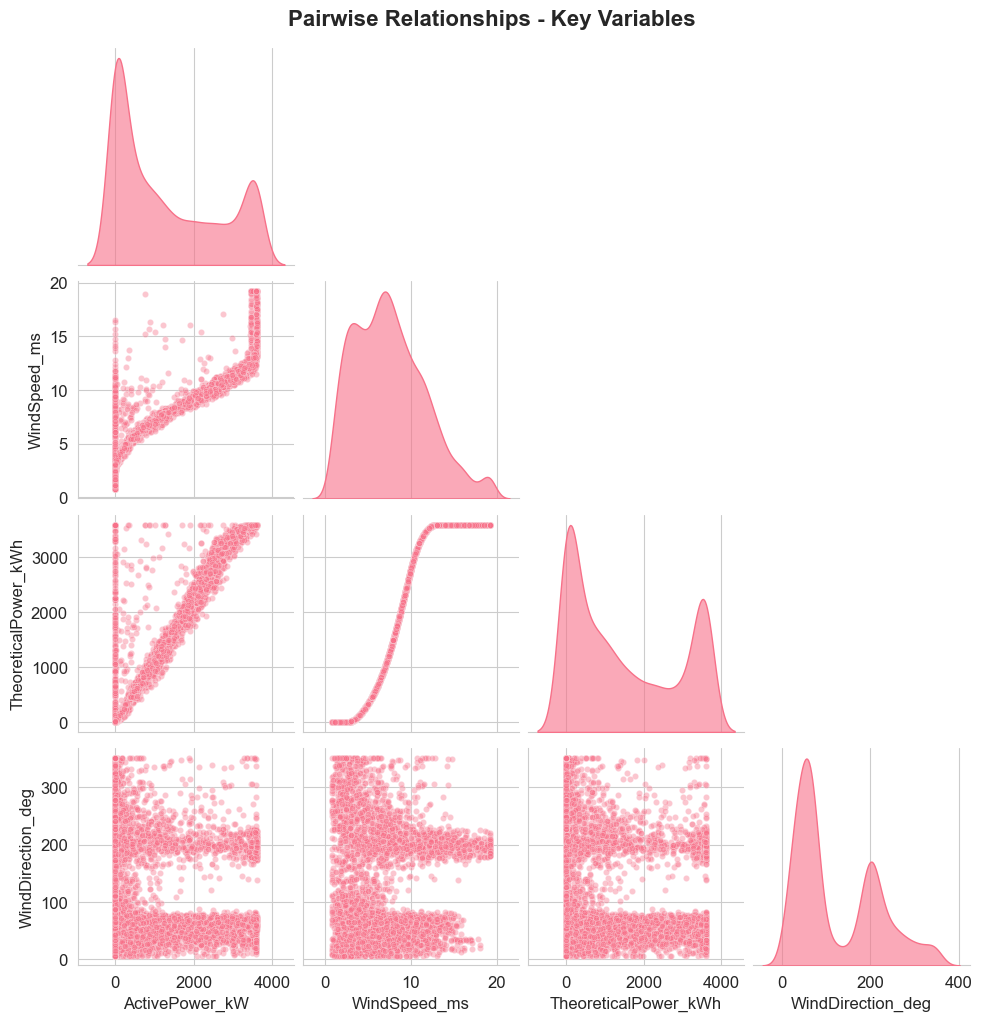

Pair plot generated ..........


In [35]:
# ============================================================================
# PAIR PLOT FOR KEY VARIABLES
# ============================================================================

print("=" * 80)
print("GENERATING PAIR PLOT (This may take a moment...)")
print("=" * 80)

# Create pair plot for key variables (sample for performance)
sample_size = min(5000, len(df))
df_sample = df.sample(sample_size, random_state=42)

pair_cols = ['ActivePower_kW', 'WindSpeed_ms', 'TheoreticalPower_kWh', 'WindDirection_deg']

g = sns.pairplot(df_sample[pair_cols], diag_kind='kde', corner=True,
                 plot_kws={'alpha': 0.4, 's': 20},
                 diag_kws={'fill': True, 'alpha': 0.6})
g.fig.suptitle('Pairwise Relationships - Key Variables', fontsize=16, fontweight='bold', y=1.02)
plt.savefig('pair_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Pair plot generated ..........")